# 1.0 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.impute import SimpleImputer
from timer import Timer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import time

# 2.0 Data Understanding

## 2.1 Read Dataset

In [2]:
heart_disease = pd.read_csv('heart_disease.csv')

## 2.2 Data Exploration

In [3]:
list_column = heart_disease.columns.to_list()
list_column

['Age',
 'Gender',
 'Blood Pressure',
 'Cholesterol Level',
 'Exercise Habits',
 'Smoking',
 'Family Heart Disease',
 'Diabetes',
 'BMI',
 'High Blood Pressure',
 'Low HDL Cholesterol',
 'High LDL Cholesterol',
 'Alcohol Consumption',
 'Stress Level',
 'Sleep Hours',
 'Sugar Consumption',
 'Triglyceride Level',
 'Fasting Blood Sugar',
 'CRP Level',
 'Homocysteine Level',
 'Heart Disease Status']

In [4]:
heart_disease.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [5]:
heart_disease.shape

(10000, 21)

In [6]:
heart_disease.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [7]:
percentage_null_alcohol_consumption = (heart_disease['Alcohol Consumption'].isna().sum() / len(heart_disease)) * 100
percentage_null_alcohol_consumption

np.float64(25.86)

In [8]:
heart_disease['Alcohol Consumption'] = heart_disease['Alcohol Consumption'].fillna('None')

## 2.3 Differentiate Data

In [9]:
categorical_data = heart_disease.select_dtypes(include=['object'])
numerical_data = heart_disease.select_dtypes(include=['int64', 'float64'])

print("Categorical Data Columns:")
i=1

for cat_columns in categorical_data.columns:
  print(str(i) + '. ' + cat_columns)
  i += 1

i=1
print("\nNumerical Data Columns:")
for num_columns in numerical_data.columns:
  print(str(i) + '. ' + num_columns)
  i += 1

Categorical Data Columns:
1. Gender
2. Exercise Habits
3. Smoking
4. Family Heart Disease
5. Diabetes
6. High Blood Pressure
7. Low HDL Cholesterol
8. High LDL Cholesterol
9. Alcohol Consumption
10. Stress Level
11. Sugar Consumption
12. Heart Disease Status

Numerical Data Columns:
1. Age
2. Blood Pressure
3. Cholesterol Level
4. BMI
5. Sleep Hours
6. Triglyceride Level
7. Fasting Blood Sugar
8. CRP Level
9. Homocysteine Level


## 2.4 Data Visualisation

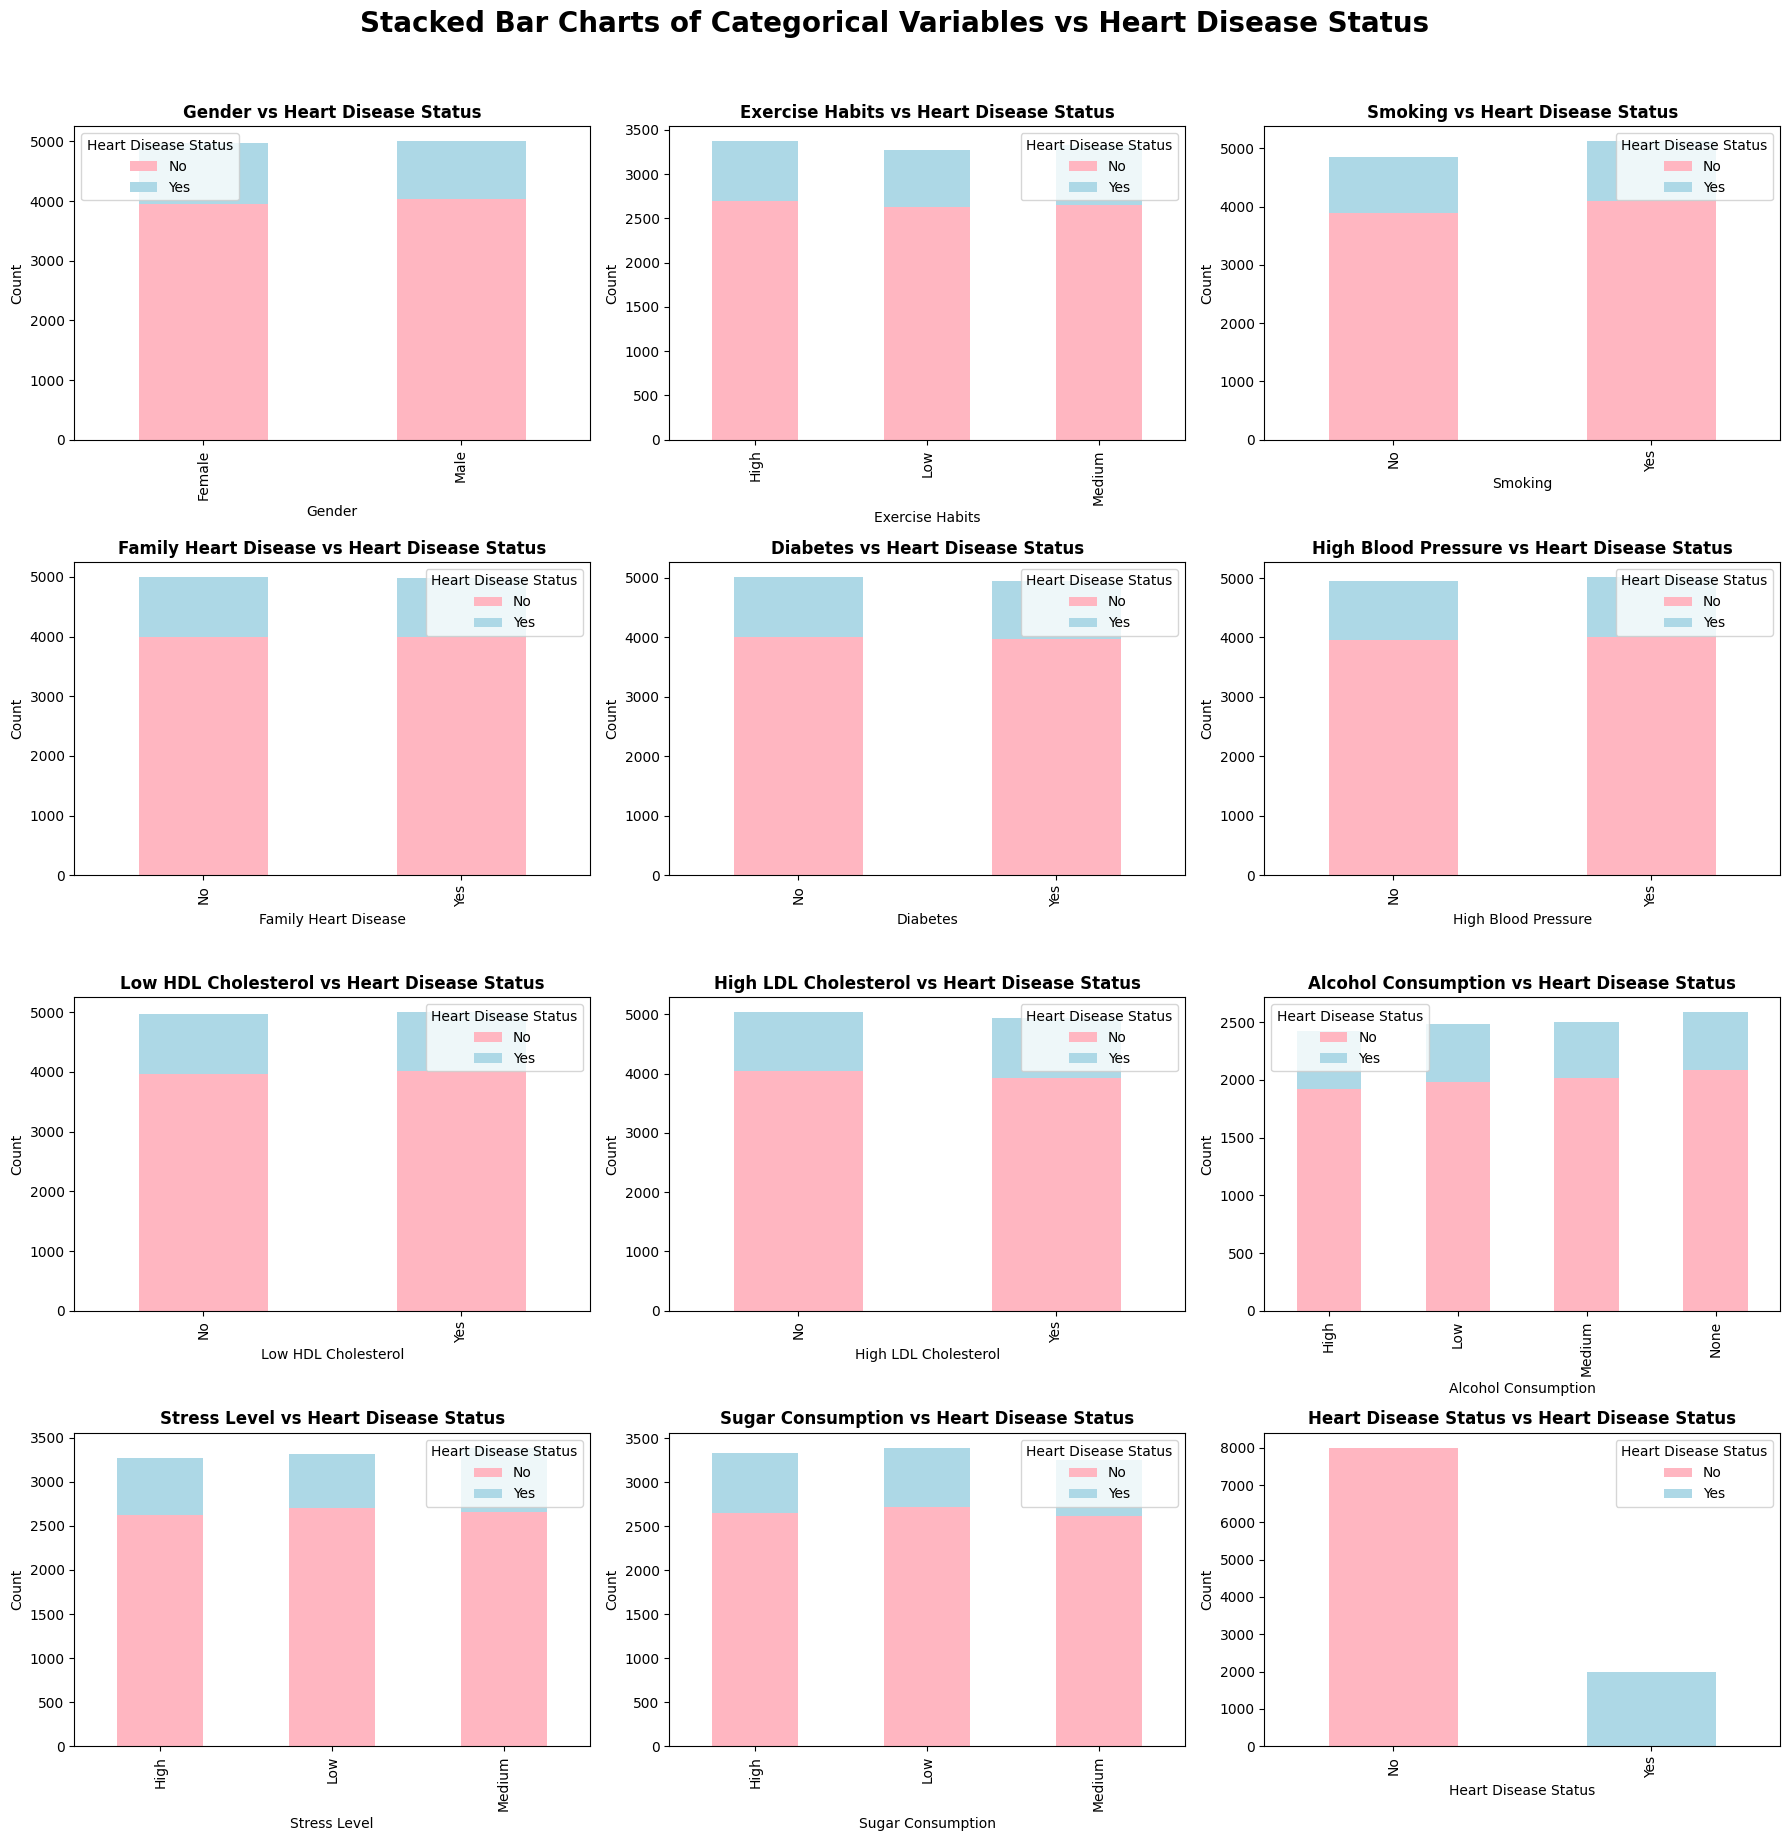

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_data.columns):
    counts = pd.crosstab(heart_disease[col], heart_disease['Heart Disease Status'])
    counts.plot(kind="bar", stacked=True, ax=axes[i], color=["lightpink", "lightblue"])

    axes[i].set_title(f"{col} vs Heart Disease Status", fontweight="bold")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].legend(title="Heart Disease Status", labels=["No", "Yes"])

plt.suptitle("Stacked Bar Charts of Categorical Variables vs Heart Disease Status",
             fontsize=20, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


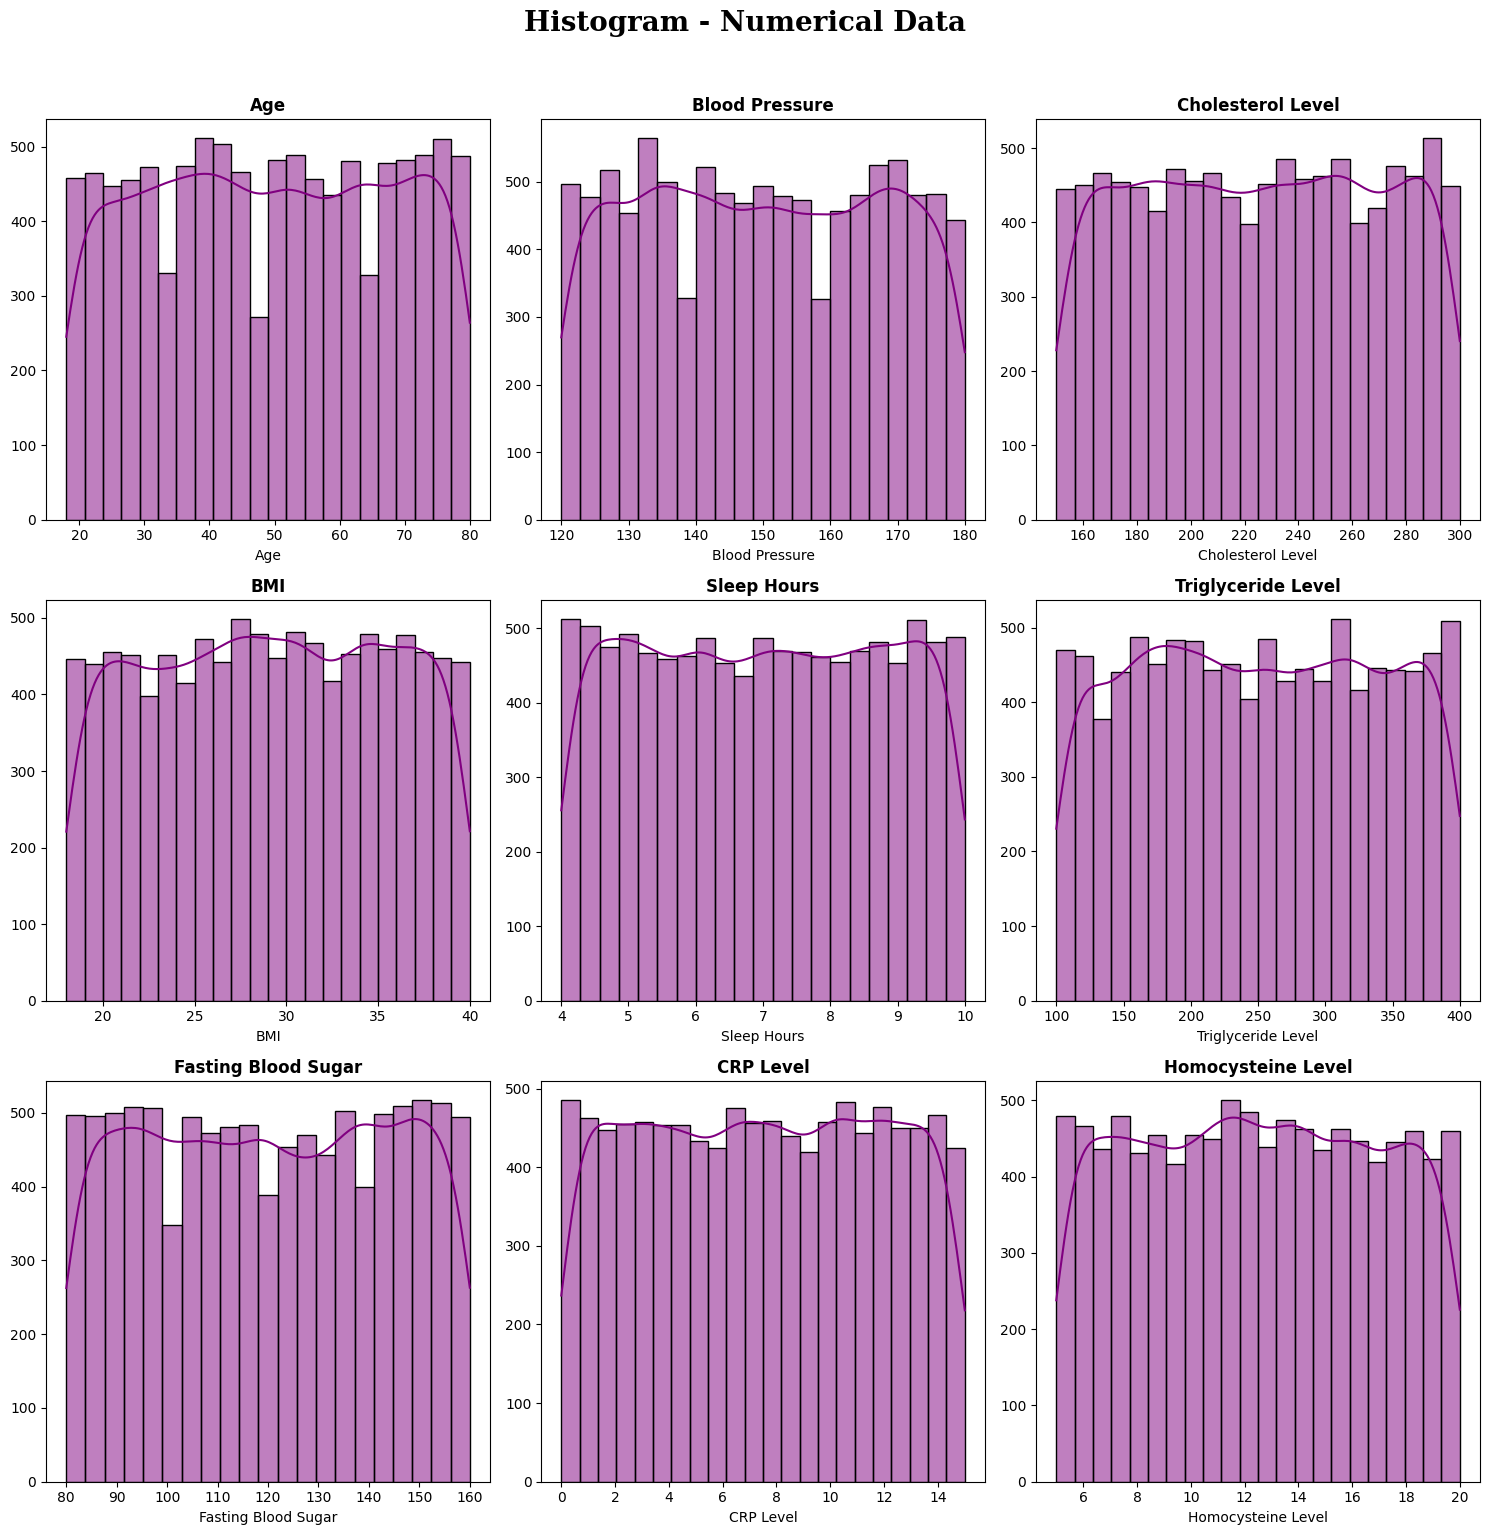

In [11]:
#Histogram
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()


for i, column in enumerate(numerical_data.columns):
    ax = sns.histplot(heart_disease[column], ax=axs[i], kde=True, color='purple')
    axs[i].set_title(column,fontweight='bold')
    axs[i].set_ylabel('')

    fig.suptitle(
        "Histogram - Numerical Data",
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        y=1.02
    )

plt.tight_layout()
plt.show()

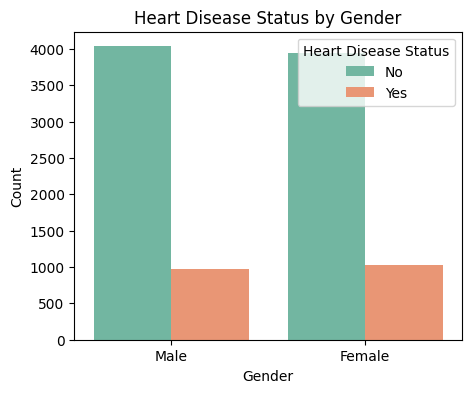

In [12]:
plt.figure(figsize=(5, 4))

sns.countplot(
    x='Gender',
    hue='Heart Disease Status',
    data=heart_disease,
    palette="Set2"
)

plt.title("Heart Disease Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Display the plot
plt.show()

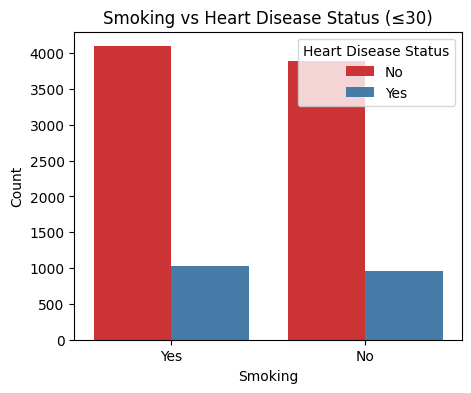

In [13]:
plt.figure(figsize=(5, 4))
sns.countplot(
    x='Smoking',
    hue='Heart Disease Status',
    data=heart_disease,
    palette="Set1"
)

plt.title("Smoking vs Heart Disease Status (≤30)")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.show()

# 3.0 Data Preparation

## 3.1 Check Missing Value

In [14]:
missing_count = heart_disease.isna().sum()
missing_percentage = (missing_count / len(heart_disease)) * 100
missing_summary = pd.DataFrame({
    "Missing Values": missing_count,
    "Percentage (%)": missing_percentage.round(2)
})
missing_summary = missing_summary[missing_summary["Missing Values"] > 0]
missing_summary = missing_summary.sort_values(by="Percentage (%)", ascending=False)
print(missing_summary)

                      Missing Values  Percentage (%)
Sugar Consumption                 30            0.30
Diabetes                          30            0.30
Cholesterol Level                 30            0.30
Age                               29            0.29
CRP Level                         26            0.26
Triglyceride Level                26            0.26
High Blood Pressure               26            0.26
High LDL Cholesterol              26            0.26
Low HDL Cholesterol               25            0.25
Sleep Hours                       25            0.25
Exercise Habits                   25            0.25
Smoking                           25            0.25
Stress Level                      22            0.22
Fasting Blood Sugar               22            0.22
BMI                               22            0.22
Family Heart Disease              21            0.21
Homocysteine Level                20            0.20
Blood Pressure                    19          

In [15]:
pd.crosstab(heart_disease['Alcohol Consumption'], heart_disease['Heart Disease Status'], normalize='index')

Heart Disease Status,No,Yes
Alcohol Consumption,,
High,0.790190,0.209810
Low,0.795820,0.204180
Medium,0.805600,0.194400
None,0.807811,0.192189


## 3.2 Check Unique Variables

In [16]:
heart_disease.nunique()

Age                       63
Gender                     2
Blood Pressure            61
Cholesterol Level        151
Exercise Habits            3
Smoking                    2
Family Heart Disease       2
Diabetes                   2
BMI                     9978
High Blood Pressure        2
Low HDL Cholesterol        2
High LDL Cholesterol       2
Alcohol Consumption        4
Stress Level               3
Sleep Hours             9975
Sugar Consumption          3
Triglyceride Level       301
Fasting Blood Sugar       81
CRP Level               9974
Homocysteine Level      9980
Heart Disease Status       2
dtype: int64

In [17]:
unique_values = categorical_data.apply(pd.Series.unique)
unique_values

Gender                        [Male, Female, nan]
Exercise Habits          [High, Low, Medium, nan]
Smoking                            [Yes, No, nan]
Family Heart Disease               [Yes, No, nan]
Diabetes                           [No, Yes, nan]
High Blood Pressure                [Yes, No, nan]
Low HDL Cholesterol                [Yes, No, nan]
High LDL Cholesterol               [No, Yes, nan]
Alcohol Consumption     [High, Medium, Low, None]
Stress Level             [Medium, High, Low, nan]
Sugar Consumption        [Medium, Low, High, nan]
Heart Disease Status                    [No, Yes]
dtype: object

## 3.3 Check Duplicate

In [18]:
heart_disease.duplicated().sum()

np.int64(0)

## 3.4 Deal with Missing Value

In [19]:
# Median imputer for numeric
num_cols = numerical_data.columns.tolist()
cat_cols = categorical_data.columns.tolist()

median_imputer = SimpleImputer(strategy="median")
heart_disease[num_cols] = median_imputer.fit_transform(heart_disease[num_cols])

# Mode imputer for categorical
mode_imputer = SimpleImputer(strategy="most_frequent")
heart_disease[cat_cols] = mode_imputer.fit_transform(heart_disease[cat_cols])


## 3.5 Outliers

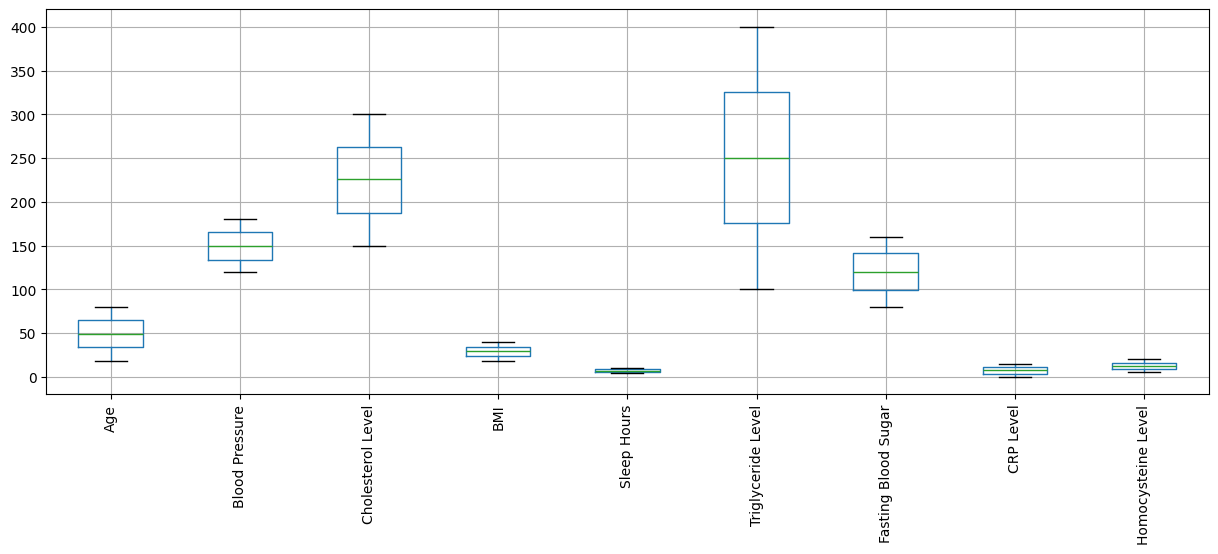

In [20]:
num_cols = heart_disease.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15, 5))
heart_disease[num_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

In [21]:
def boxplot(df, columnName):
    Q1 = np.percentile(df[columnName], 25)
    Q3 = np.percentile(df[columnName], 75)
    IQR = Q3 - Q1
    minv = np.min(df[columnName])
    maxv = np.max(df[columnName])
    mean = np.mean(df[columnName])
    median = np.median(df[columnName])
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    outliers = df[columnName][(df[columnName] < lower_whisker) | (df[columnName] > upper_whisker)]

    print(f"\n{columnName}")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Min: {minv}")
    print(f"Max: {maxv}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median}")
    print(f"Lower Whisker: {lower_whisker:.2f}")
    print(f"Upper Whisker: {upper_whisker:.2f}")
    print(f"Number of Outliers: {len(outliers)}")

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[columnName], color="skyblue")
    plt.title(f"Boxplot of {columnName}")
    plt.show()


Age
Q1: 34.00
Q3: 65.00
IQR: 31.00
Min: 18.0
Max: 80.0
Mean: 49.30
Median: 49.0
Lower Whisker: -12.50
Upper Whisker: 111.50
Number of Outliers: 0


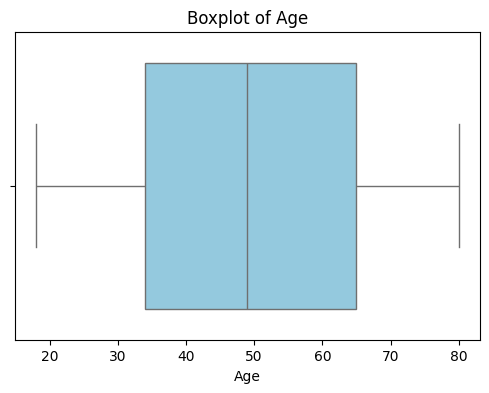


Blood Pressure
Q1: 134.00
Q3: 165.00
IQR: 31.00
Min: 120.0
Max: 180.0
Mean: 149.76
Median: 150.0
Lower Whisker: 87.50
Upper Whisker: 211.50
Number of Outliers: 0


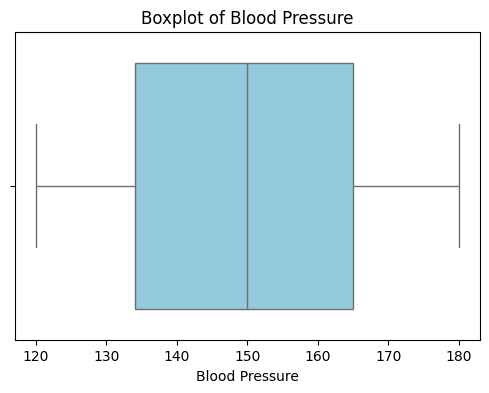


Cholesterol Level
Q1: 187.00
Q3: 263.00
IQR: 76.00
Min: 150.0
Max: 300.0
Mean: 225.43
Median: 226.0
Lower Whisker: 73.00
Upper Whisker: 377.00
Number of Outliers: 0


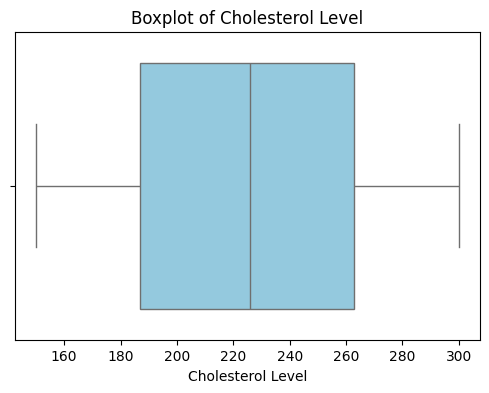


BMI
Q1: 23.67
Q3: 34.51
IQR: 10.84
Min: 18.00283694367505
Max: 39.99695379658124
Mean: 29.08
Median: 29.079491590086043
Lower Whisker: 7.41
Upper Whisker: 50.77
Number of Outliers: 0


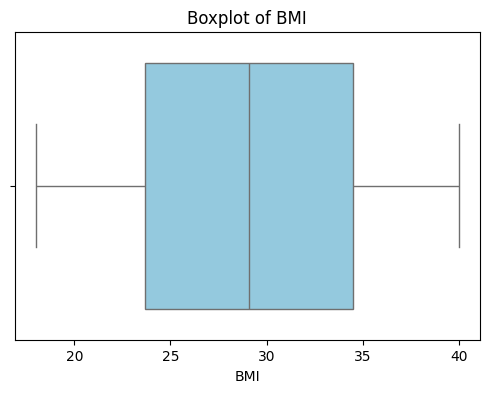


Sleep Hours
Q1: 5.46
Q3: 8.53
IQR: 3.07
Min: 4.000605495703501
Max: 9.999952253817796
Mean: 6.99
Median: 7.003252334814371
Lower Whisker: 0.85
Upper Whisker: 13.14
Number of Outliers: 0


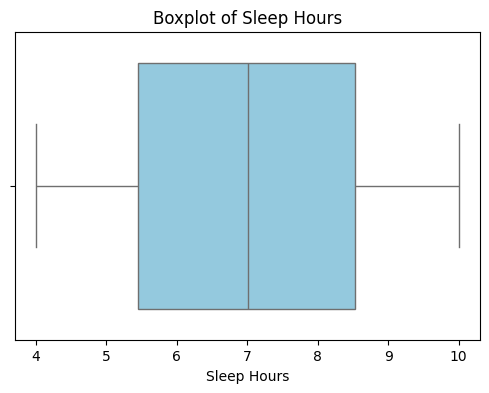


Triglyceride Level
Q1: 176.00
Q3: 326.00
IQR: 150.00
Min: 100.0
Max: 400.0
Mean: 250.73
Median: 250.0
Lower Whisker: -49.00
Upper Whisker: 551.00
Number of Outliers: 0


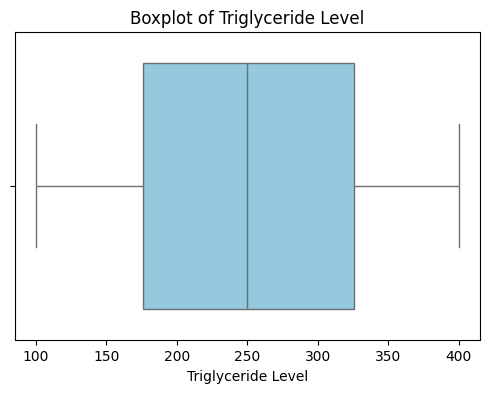


Fasting Blood Sugar
Q1: 99.00
Q3: 141.00
IQR: 42.00
Min: 80.0
Max: 160.0
Mean: 120.14
Median: 120.0
Lower Whisker: 36.00
Upper Whisker: 204.00
Number of Outliers: 0


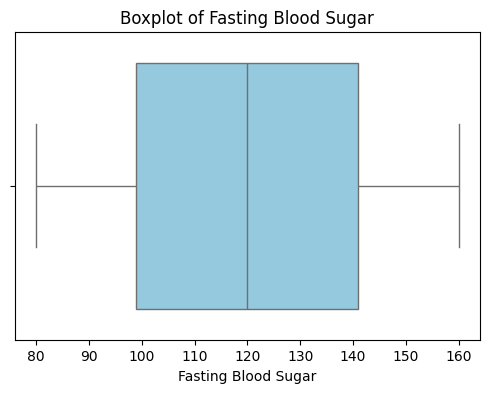


CRP Level
Q1: 3.68
Q3: 11.24
IQR: 7.56
Min: 0.0036467123625
Max: 14.997086730710286
Mean: 7.47
Median: 7.472164393020417
Lower Whisker: -7.66
Upper Whisker: 22.59
Number of Outliers: 0


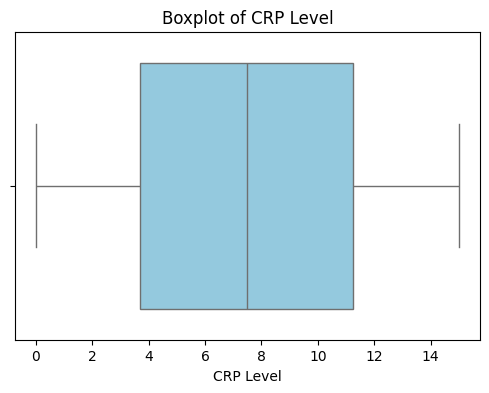


Homocysteine Level
Q1: 8.73
Q3: 16.13
IQR: 7.40
Min: 5.000236488356111
Max: 19.99903699208996
Mean: 12.46
Median: 12.409395381646618
Lower Whisker: -2.37
Upper Whisker: 27.23
Number of Outliers: 0


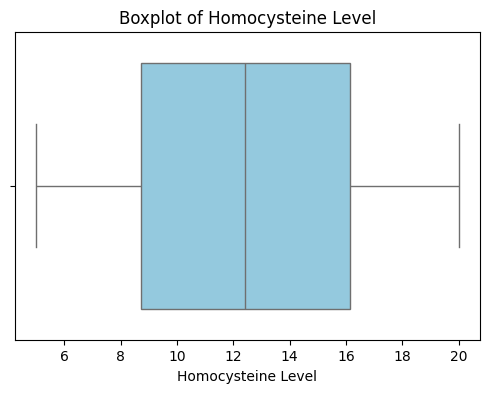

In [22]:
for col in numerical_data:
    boxplot(heart_disease, col)

In [23]:
numerical_data.skew()

Age                   -0.006789
Blood Pressure         0.013907
Cholesterol Level     -0.007120
BMI                   -0.021342
Sleep Hours            0.000172
Triglyceride Level     0.006142
Fasting Blood Sugar   -0.008915
CRP Level             -0.004069
Homocysteine Level     0.007886
dtype: float64

# 4.0 EDA

In [24]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

## 4.1 Update Categorical Variables

In [25]:
new_categorical = heart_disease.select_dtypes(include=['object'])
#Display the unique values for each continuous data
new_cat_unique_values = new_categorical.apply(pd.Series.unique)
new_cat_unique_values

Gender                             [Male, Female]
Exercise Habits               [High, Low, Medium]
Smoking                                 [Yes, No]
Family Heart Disease                    [Yes, No]
Diabetes                                [No, Yes]
High Blood Pressure                     [Yes, No]
Low HDL Cholesterol                     [Yes, No]
High LDL Cholesterol                    [No, Yes]
Alcohol Consumption     [High, Medium, Low, None]
Stress Level                  [Medium, High, Low]
Sugar Consumption             [Medium, Low, High]
Heart Disease Status                    [No, Yes]
dtype: object

## 4.2 Update the Continuous Variables

In [26]:
new_numerical = heart_disease.select_dtypes(include=['int64', 'float64'])
#Display the unique values for each continuous data
new_num_unique_values = new_numerical.apply(pd.Series.unique)
new_num_unique_values

Age                    [56.0, 69.0, 46.0, 32.0, 60.0, 25.0, 78.0, 38....
Blood Pressure         [153.0, 146.0, 126.0, 122.0, 166.0, 152.0, 121...
Cholesterol Level      [155.0, 286.0, 216.0, 293.0, 242.0, 257.0, 175...
BMI                    [24.991591091690363, 25.2217985244363, 29.8554...
Sleep Hours            [7.633228380474903, 8.744033968961478, 4.44044...
Triglyceride Level     [342.0, 133.0, 393.0, 293.0, 263.0, 126.0, 107...
Fasting Blood Sugar    [120.0, 157.0, 92.0, 94.0, 154.0, 91.0, 85.0, ...
CRP Level              [12.969245689269126, 9.355389404894291, 12.709...
Homocysteine Level     [12.387250402785936, 19.298875477603804, 11.23...
dtype: object

## 4.3 Visualize Categorical Data

In [27]:
#Display the percentage of value counts for each categorical data
count = {}
for i in new_categorical:
    count[i] = new_categorical[i].value_counts(normalize=True) * 100
    print(f"\nPercentage value counts for {i}:")
    print(round(count[i], 2))


Percentage value counts for Gender:
Gender
Male      50.22
Female    49.78
Name: proportion, dtype: float64

Percentage value counts for Exercise Habits:
Exercise Habits
High      33.97
Medium    33.32
Low       32.71
Name: proportion, dtype: float64

Percentage value counts for Smoking:
Smoking
Yes    51.48
No     48.52
Name: proportion, dtype: float64

Percentage value counts for Family Heart Disease:
Family Heart Disease
No     50.25
Yes    49.75
Name: proportion, dtype: float64

Percentage value counts for Diabetes:
Diabetes
No     50.48
Yes    49.52
Name: proportion, dtype: float64

Percentage value counts for High Blood Pressure:
High Blood Pressure
Yes    50.48
No     49.52
Name: proportion, dtype: float64

Percentage value counts for Low HDL Cholesterol:
Low HDL Cholesterol
Yes    50.25
No     49.75
Name: proportion, dtype: float64

Percentage value counts for High LDL Cholesterol:
High LDL Cholesterol
No     50.62
Yes    49.38
Name: proportion, dtype: float64

Percentage valu

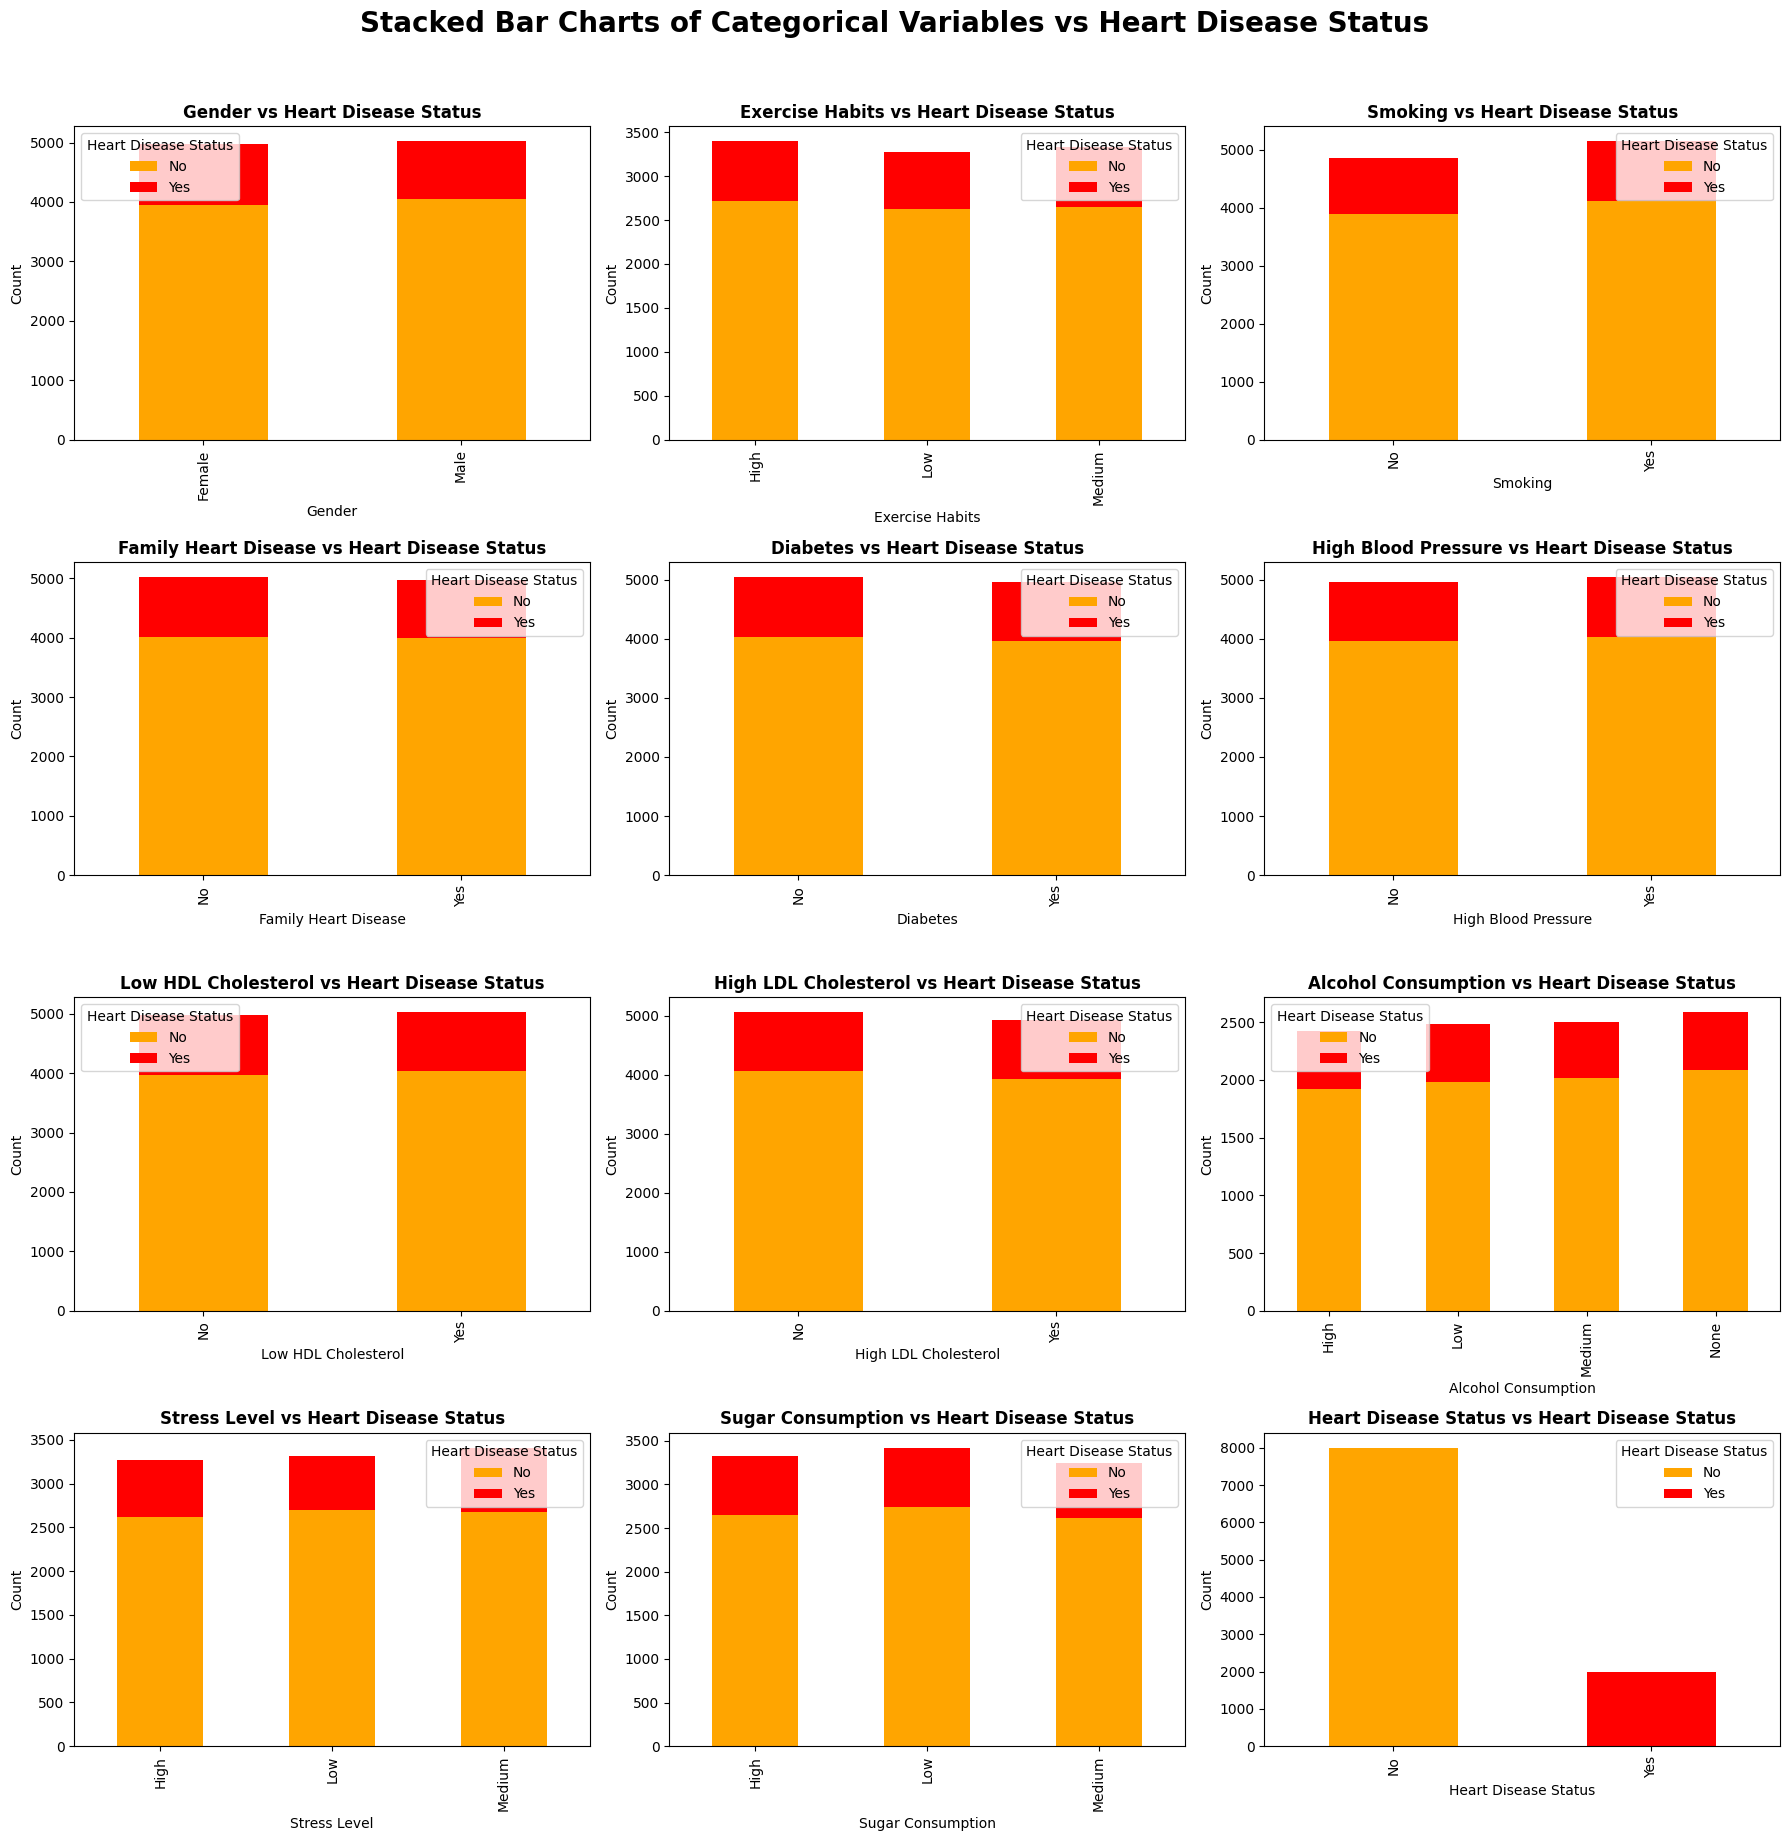

In [28]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(new_categorical.columns):
    counts = pd.crosstab(heart_disease[col], heart_disease['Heart Disease Status'])
    counts.plot(kind="bar", stacked=True, ax=axes[i], color=["orange", "red"])

    axes[i].set_title(f"{col} vs Heart Disease Status", fontweight="bold")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].legend(title="Heart Disease Status", labels=["No", "Yes"])

plt.suptitle("Stacked Bar Charts of Categorical Variables vs Heart Disease Status",
             fontsize=20, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## 4.4 Visualize Continuous Data

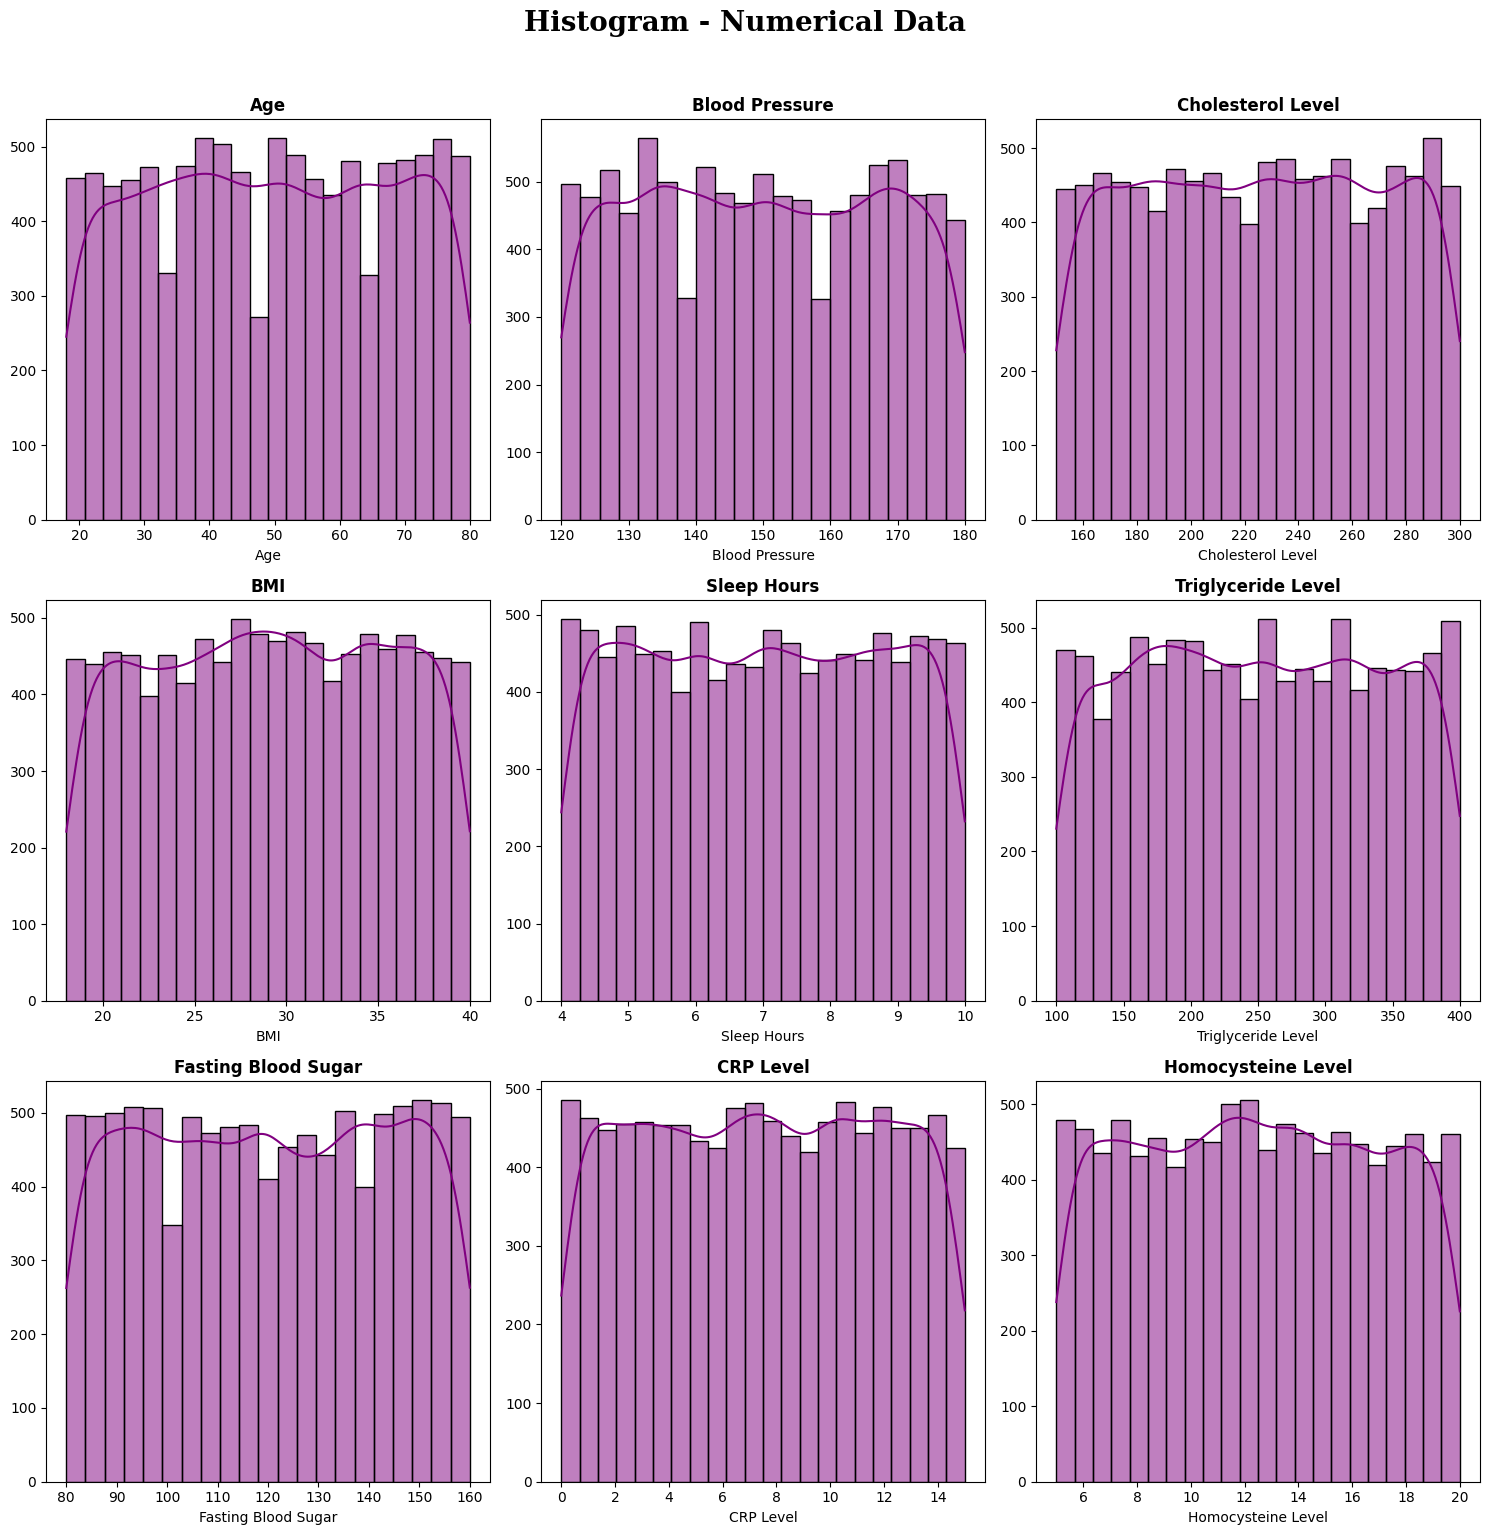

In [29]:
#Histogram
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()


for i, column in enumerate(new_numerical.columns):
    ax = sns.histplot(heart_disease[column], ax=axs[i], kde=True, color='purple')
    axs[i].set_title(column,fontweight='bold')
    axs[i].set_ylabel('')

    fig.suptitle(
        "Histogram - Numerical Data",
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        y=1.02
    )

plt.tight_layout()
plt.show()

In [30]:
def plot_kurtosis(df, column):
    # 1. Compute kurtosis
    k_val = df[column].kurtosis()
    print(f"Kurtosis for {column}: {k_val:.2f}")

    # 2. Plot KDE
    plt.figure(figsize=(5,4))
    sns.kdeplot(x=column, data=df, fill=True, color="blue")
    plt.title(f"Kernel Density Estimate Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

    # 3. Interpretation message
    if k_val < 3:
        print(f"{column}: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.")
    elif k_val == 3:
        print(f"{column}: Mesokurtic (=3) → close to normal distribution.")
    else:
        print(f"{column}: Leptokurtic (>3) → heavy tails, more extreme outliers, less consistent range.")


Kurtosis for Age: -1.20


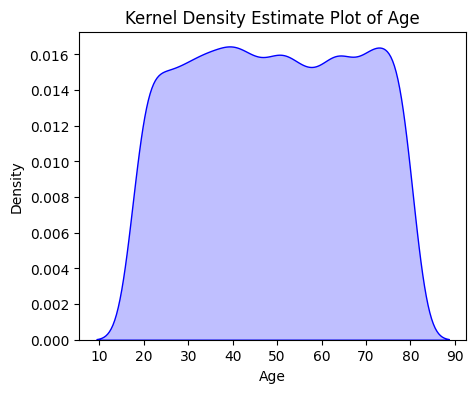

Age: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for Blood Pressure: -1.21


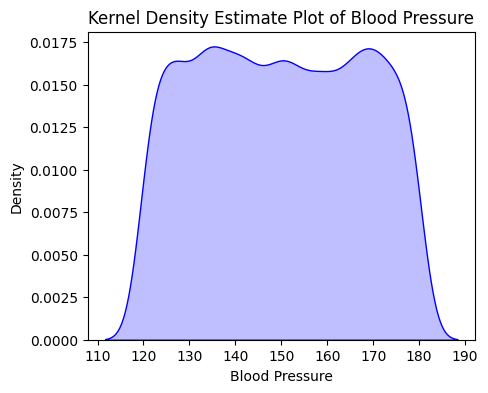

Blood Pressure: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for Cholesterol Level: -1.20


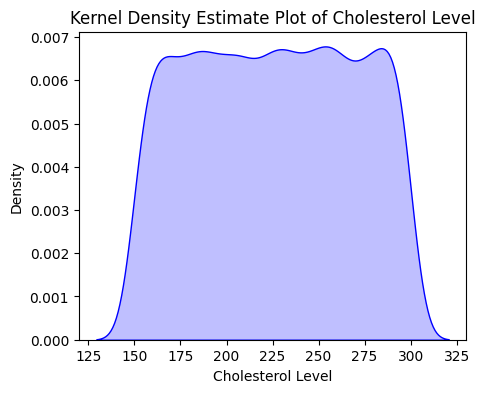

Cholesterol Level: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for BMI: -1.18


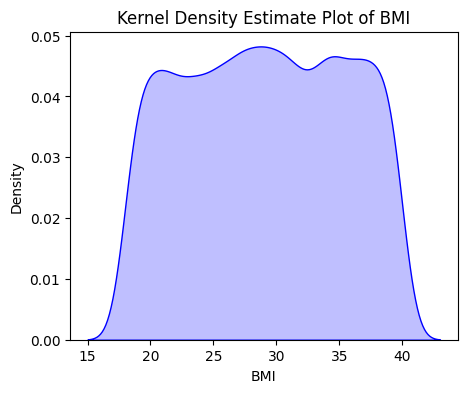

BMI: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for Sleep Hours: -1.22


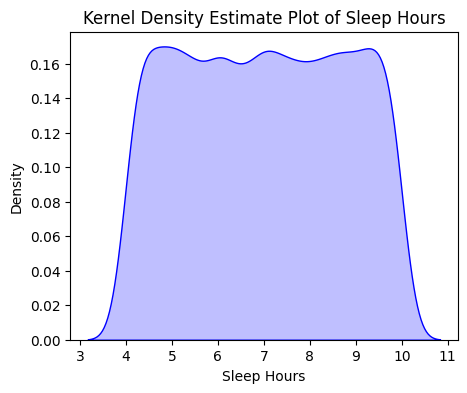

Sleep Hours: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for Triglyceride Level: -1.19


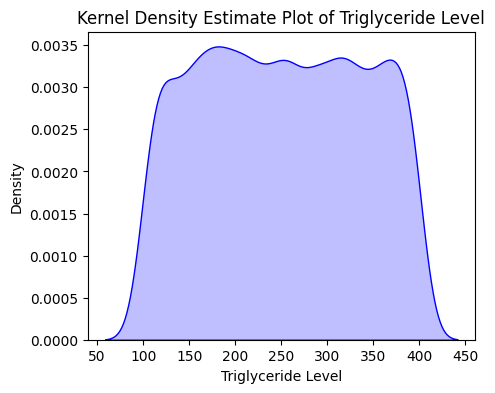

Triglyceride Level: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for Fasting Blood Sugar: -1.23


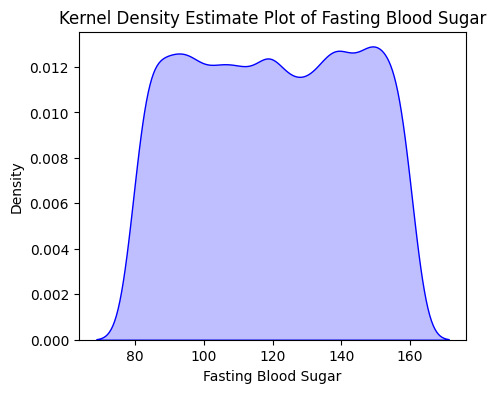

Fasting Blood Sugar: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for CRP Level: -1.20


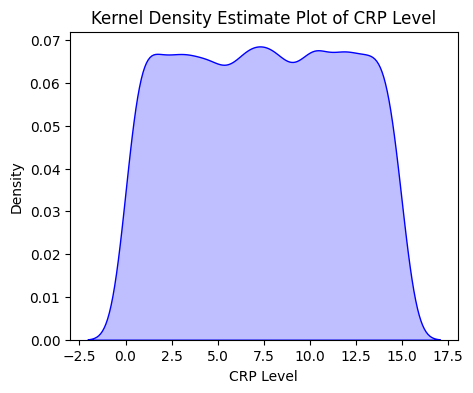

CRP Level: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.

Kurtosis for Homocysteine Level: -1.18


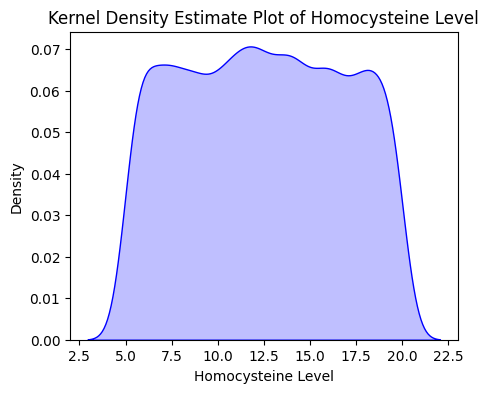

Homocysteine Level: Platykurtic (<3) → flatter than normal, fewer extreme values, more evenly spread.



In [31]:
for col in new_numerical:
    plot_kurtosis(heart_disease, col)
    print("")

# 5.0 Data Transformation

In [32]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

## 5.1 Bining

In [33]:
heart_disease[heart_disease['High Blood Pressure'] == 1]['Blood Pressure'].mean()

nan

In [34]:
from binning_helper import BinningHelper

# Apply binning
heart_disease['Sleep Index'] = heart_disease['Sleep Hours'].apply(BinningHelper.index_sleep)
heart_disease["Age Group"] = heart_disease["Age"].apply(BinningHelper.bin_age)
heart_disease["Cholesterol Group"] = heart_disease["Cholesterol Level"].apply(BinningHelper.bin_cholesterol)

# Collect value counts into a table
rows = []
for col in ["Age Group", "Cholesterol Group", "Sleep Index"]:
    counts = heart_disease[col].value_counts().reset_index()
    counts.columns = ["Category", "Count"]
    counts["Feature"] = col
    rows.append(counts)

# Combine into one DataFrame
summary_table = pd.concat(rows, ignore_index=True)[["Feature", "Category", "Count"]]
summary_table

,Feature,Category,Count
0,Age Group,Senior,3394
1,Age Group,Middle Age,3167
2,Age Group,Young Adult,2981
3,Age Group,Teen,458
4,Cholesterol Group,High,4078
5,Cholesterol Group,Low,3285
6,Cholesterol Group,Borderline High,2637
7,Sleep Index,0,3371
8,Sleep Index,2,3341
9,Sleep Index,1,3288


In [36]:
categorical_cols = heart_disease.select_dtypes(include=['category']).columns.tolist()
categorical_cols.extend(heart_disease.select_dtypes(include=['object']).columns.tolist())
numerical_cols = heart_disease.select_dtypes(include=['int64', 'float64']).columns.tolist()

## 5.2 Categorical Encoding

### 5.2.1 Binary Encoding

In [37]:
nominal_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
                'High Blood Pressure', 'Low HDL Cholesterol',
                'High LDL Cholesterol', 'Heart Disease Status']

encoder = LabelEncoder()
label_mappings = {}
rows = []

# Encode and store mappings
for col in nominal_cols:
    heart_disease[col] = encoder.fit_transform(heart_disease[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    for label, code in label_mappings[col].items():
        rows.append({"Column": col, "Category": label, "Encoded Value": code})

# Convert to DataFrame
label_mappings_df = pd.DataFrame(rows)
label_mappings_df


,Column,Category,Encoded Value
0,Gender,Female,0
1,Gender,Male,1
2,Smoking,No,0
3,Smoking,Yes,1
4,Family Heart Disease,No,0
5,Family Heart Disease,Yes,1
6,Diabetes,No,0
7,Diabetes,Yes,1
8,High Blood Pressure,No,0
9,High Blood Pressure,Yes,1


### 5.2.2 Ordinary Encoding

In [39]:
ordinal_cols = []

ordinal_mappings = {
    'Exercise Habits': [  'High', 'Medium','Low'],
    'Stress Level': ['Low', 'Medium', 'High'], 
    'Sugar Consumption': ['Low', 'Medium', 'High'],
    'Alcohol Consumption': ['None', 'Low', 'Medium', 'High'],
    'Age Group': ['Children', 'Teen', 'Young Adult', 'Middle Age', 'Senior'],
    'Cholesterol Group': ['Low', 'Borderline High', 'High']

}

In [40]:
rows = []

# Loop through ordinal mappings
for col, order in ordinal_mappings.items():
    if col in categorical_cols:
        ordinal_cols.append(col)
        mapping = {value: idx for idx, value in enumerate(order)}
        
        # Apply encoding
        heart_disease[col] = heart_disease[col].map(mapping)
        
        # Add rows for table
        for value, idx in mapping.items():
            count = (heart_disease[col] == idx).sum()
            rows.append({
                "Feature": col,
                "Original Category": value,
                "Encoded Value": idx,
                "Count": count
            })

# Create summary DataFrame
ordinal_encoding_df = pd.DataFrame(rows)
ordinal_encoding_df

,Feature,Original Category,Encoded Value,Count
0,Exercise Habits,High,0,3397
1,Exercise Habits,Medium,1,3332
2,Exercise Habits,Low,2,3271
3,Stress Level,Low,0,3320
4,Stress Level,Medium,1,3409
5,Stress Level,High,2,3271
6,Sugar Consumption,Low,0,3420
7,Sugar Consumption,Medium,1,3250
8,Sugar Consumption,High,2,3330
9,Alcohol Consumption,None,0,2586


In [42]:
for col in heart_disease.select_dtypes(include=['category']).columns:
    # First convert to object type (string) then to integer
    heart_disease[col] = heart_disease[col].astype('object')
    heart_disease[col] = heart_disease[col].astype('int64')

# 6.0 Feature Engineering

## 6.1 Cholesterol Factor

In [43]:
heart_disease['Cholesterol_Risk'] = heart_disease['High LDL Cholesterol'] + heart_disease['Low HDL Cholesterol']
heart_disease['Cholesterol Factor'] = heart_disease['Cholesterol Group'].astype(int) + heart_disease['Cholesterol_Risk'].astype(int)

# 7.0 Correlation Analysis

## 7.1 Features to Features

In [44]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  int64  
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  int64  
 5   Smoking               10000 non-null  int64  
 6   Family Heart Disease  10000 non-null  int64  
 7   Diabetes              10000 non-null  int64  
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  int64  
 10  Low HDL Cholesterol   10000 non-null  int64  
 11  High LDL Cholesterol  10000 non-null  int64  
 12  Alcohol Consumption   10000 non-null  int64  
 13  Stress Level          10000 non-null  int64  
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

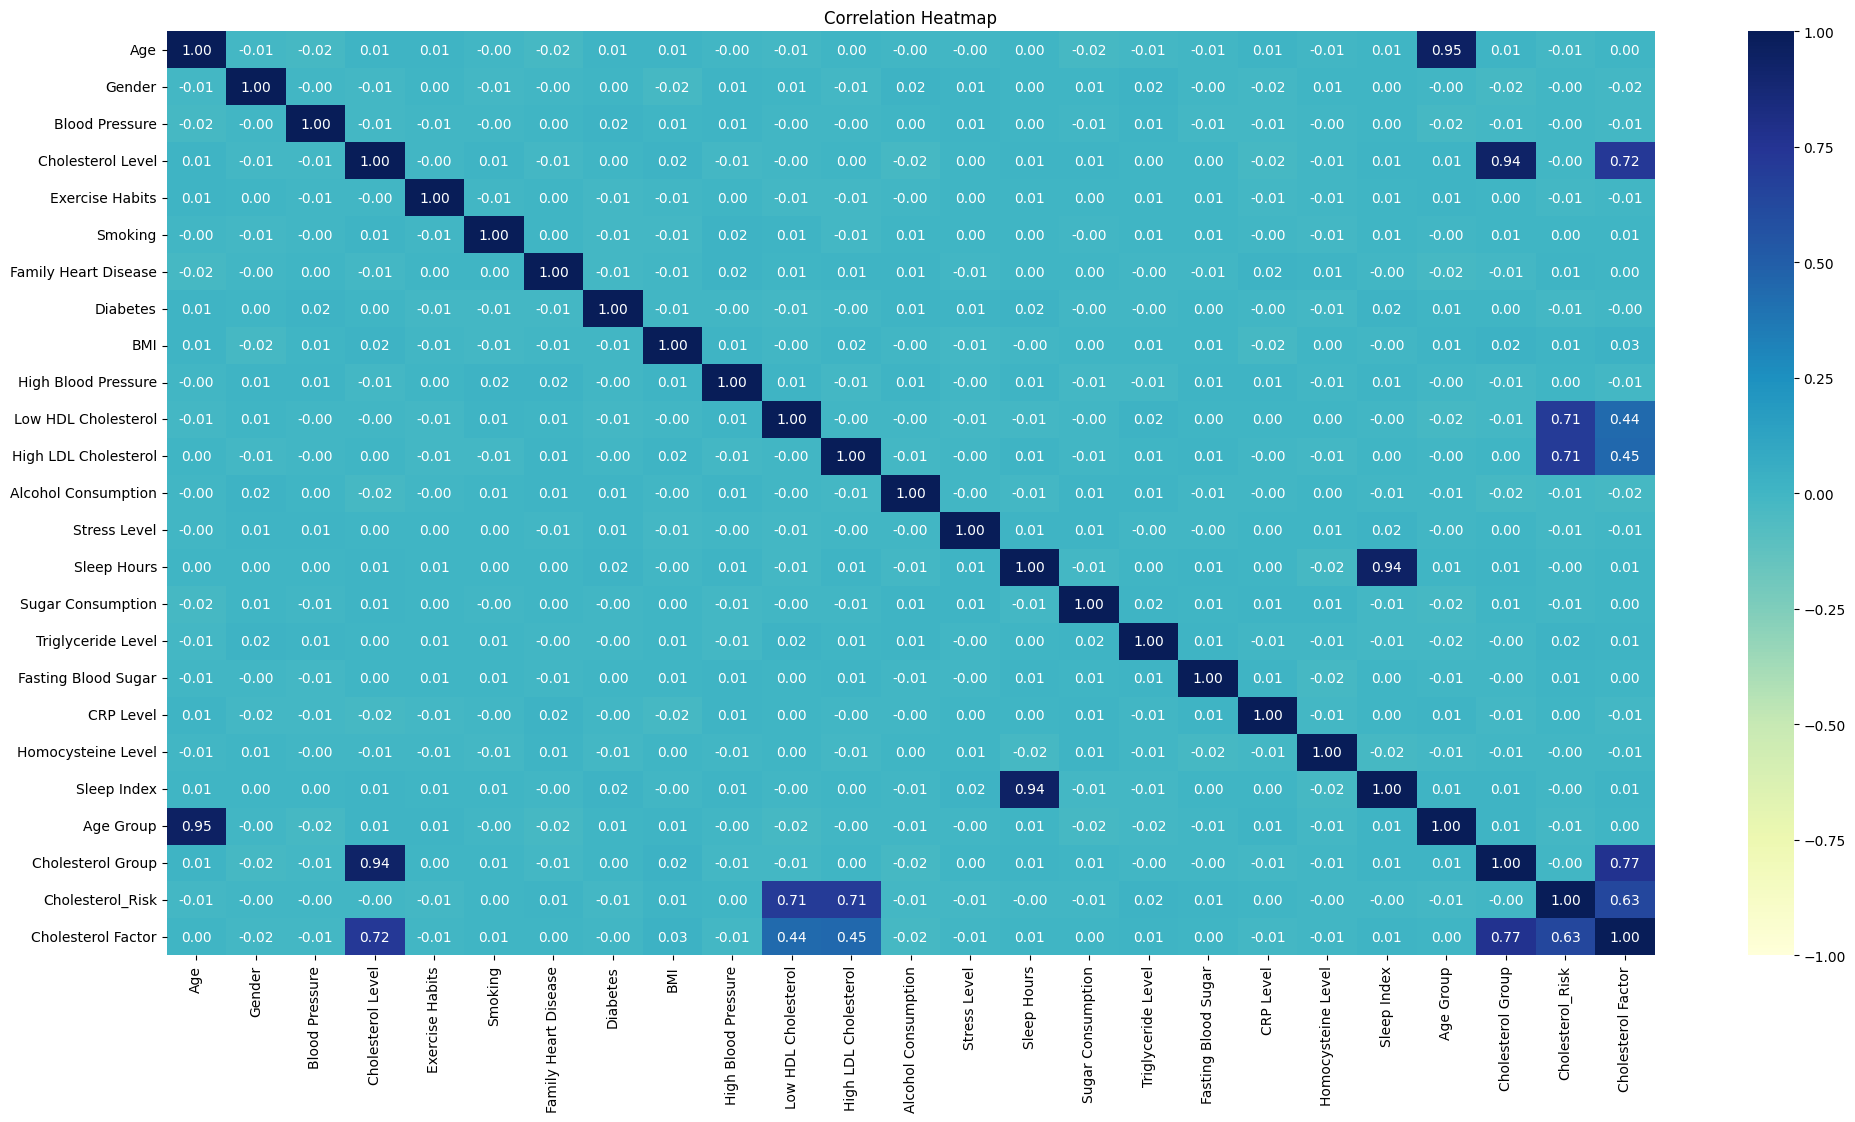

In [45]:
X = heart_disease.drop('Heart Disease Status', axis=1)
correlation_matrix = X.corr()


#Plotting the correlation heatmap
plt.figure(figsize=(24,12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# columns_to_drop = ['Exercise Habits', 'Smoking', 'Lifestyle', 'Alcohol Consumption', 'Stress Level',
#                    'Age','Sleep Hours',
#                    'Cholesterol Group', 'Cholesterol_Risk', 'Cholesterol Level', 'High LDL Cholesterol', 'Low HDL Cholesterol']
columns_to_drop = ['Age','Sleep Hours',
                   'Cholesterol Group', 'Cholesterol_Risk', 'Cholesterol Level', 'High LDL Cholesterol', 'Low HDL Cholesterol']
heart_disease.drop(columns=columns_to_drop, inplace=True)

## 7.2 Features to Target

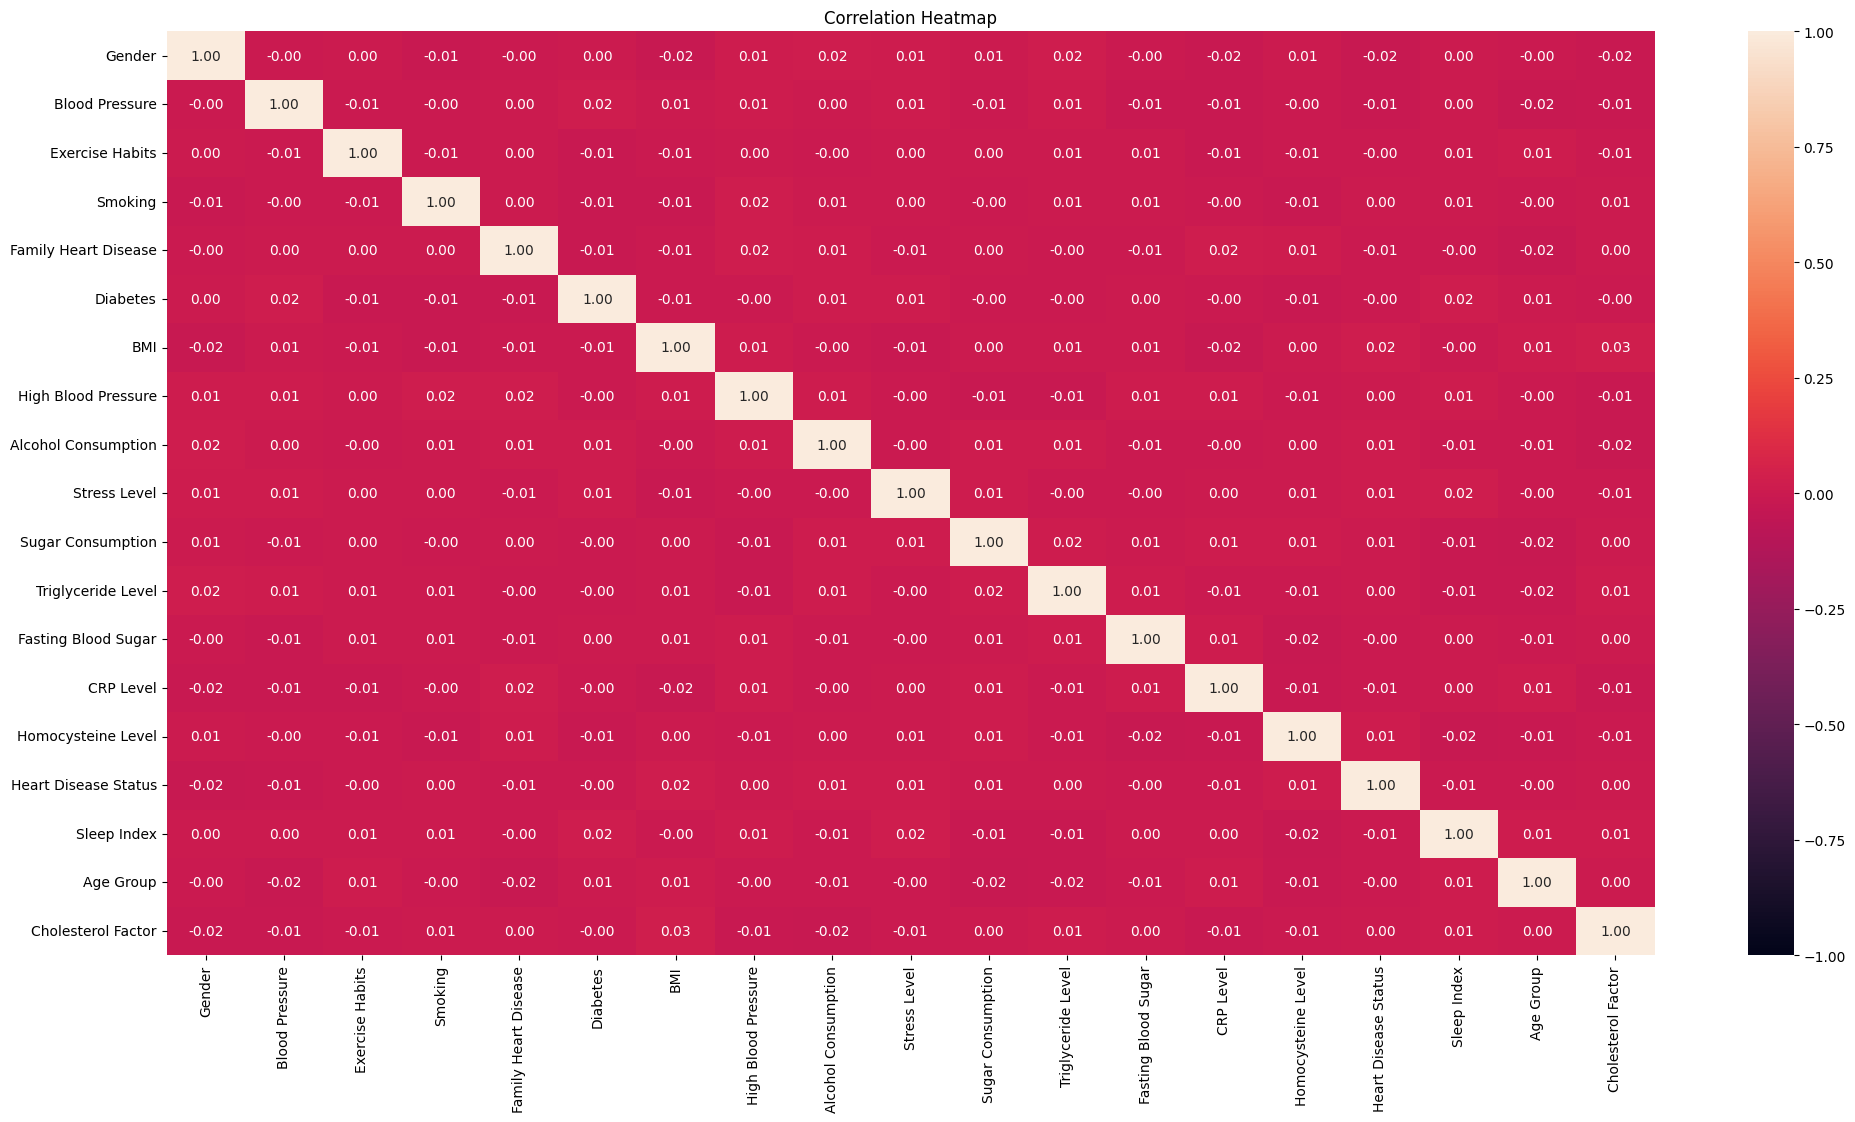

In [47]:
correlation_matrix = heart_disease.corr()
#plotting the correlation heatmap
plt.figure(figsize=(24,12))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

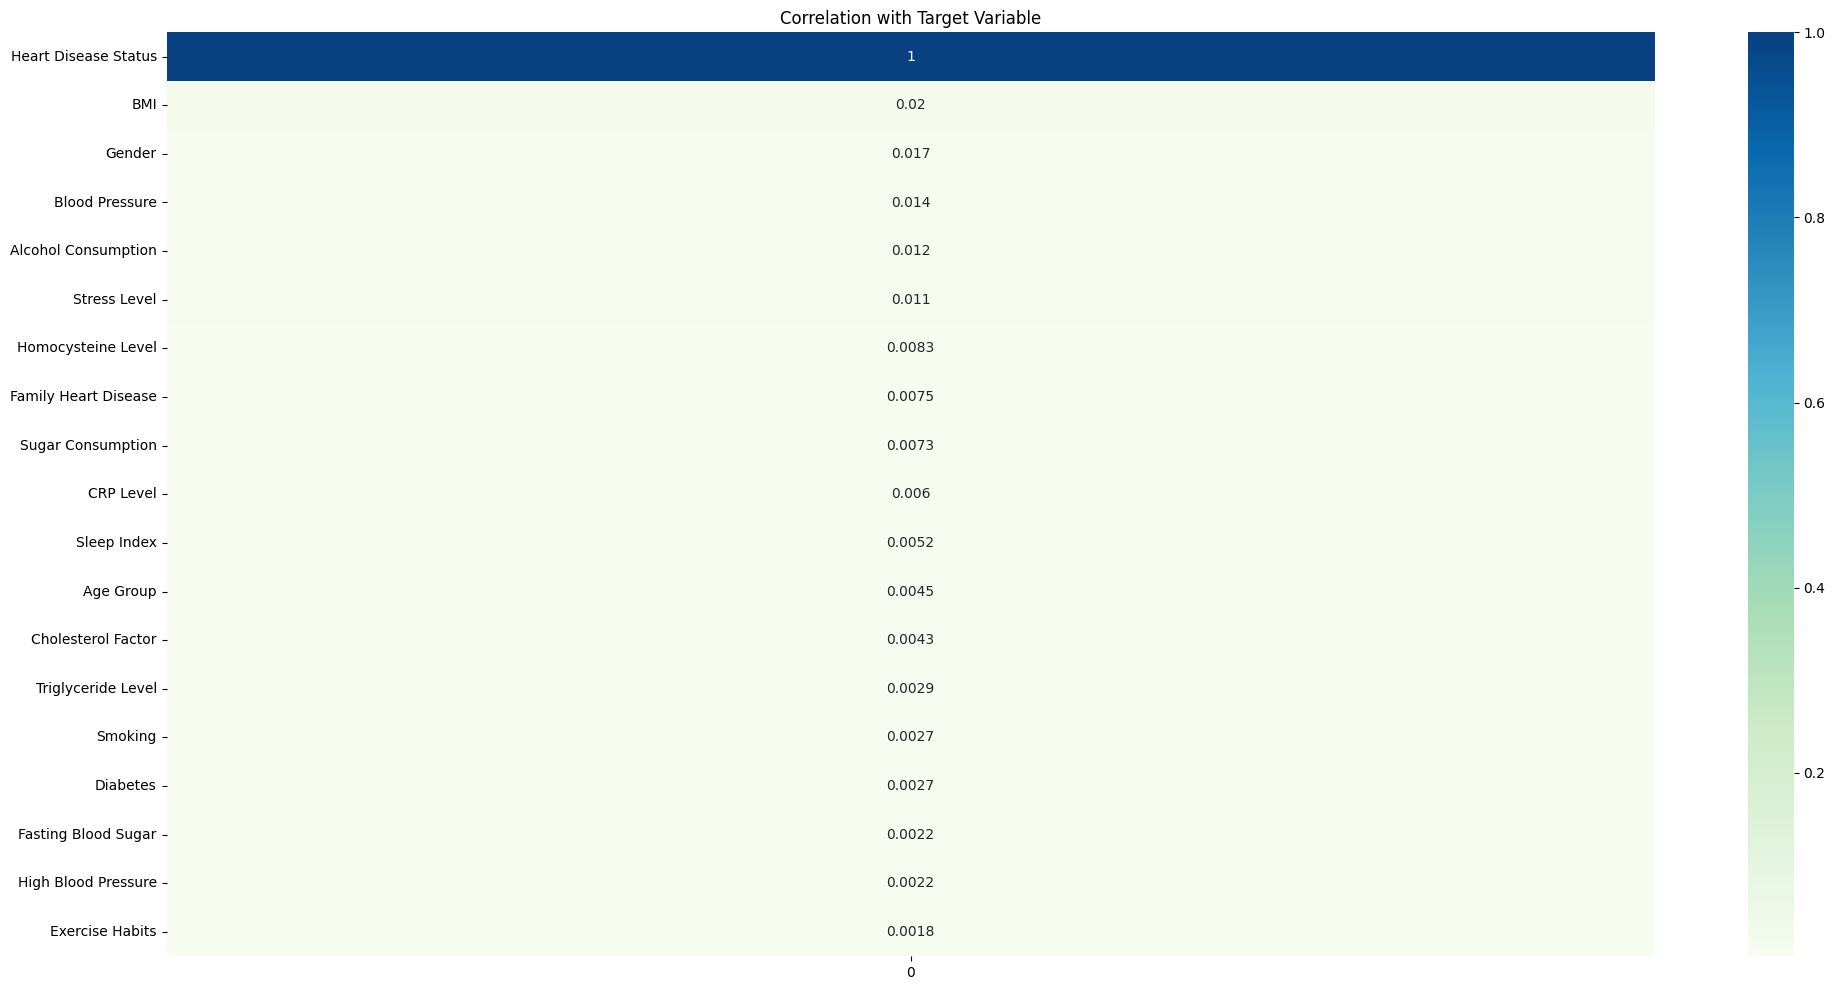

In [48]:
# Create a correlation matrix with target variable
corr_with_target = heart_disease.corrwith(heart_disease['Heart Disease Status'])

# Sort features by correlation with target variable
abs_corr = abs(corr_with_target)
abs_corr = abs_corr.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(abs_corr.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [49]:
heart_disease.columns

Index(['Gender', 'Blood Pressure', 'Exercise Habits', 'Smoking',
       'Family Heart Disease', 'Diabetes', 'BMI', 'High Blood Pressure',
       'Alcohol Consumption', 'Stress Level', 'Sugar Consumption',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level', 'Heart Disease Status', 'Sleep Index',
       'Age Group', 'Cholesterol Factor'],
      dtype='object')

# 8.0 Balance Target Variable

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64


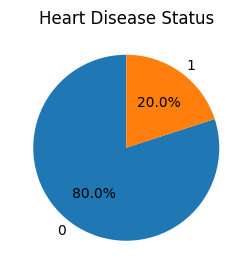

In [50]:
print(heart_disease["Heart Disease Status"].value_counts())

plt.figure(figsize=(3, 4))
plt.pie(heart_disease['Heart Disease Status'].value_counts(), labels=heart_disease['Heart Disease Status'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Status')
plt.show()

In [51]:
heart_disease.shape

(10000, 19)

In [52]:
X = heart_disease.drop(columns=["Heart Disease Status"])
y = heart_disease["Heart Disease Status"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 18)
y shape: (10000,)


## Split Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## Balancing Data

Before SMOTETomek Sampling:
Heart Disease Status
0    6400
1    1600
Name: count, dtype: int64 


After SMOTETomek Sampling:
Heart Disease Status
0    6325
1    6325
Name: count, dtype: int64

Percentages after SMOTETomek Sampling:
Heart Disease Status
0    50.0
1    50.0
Name: proportion, dtype: float64


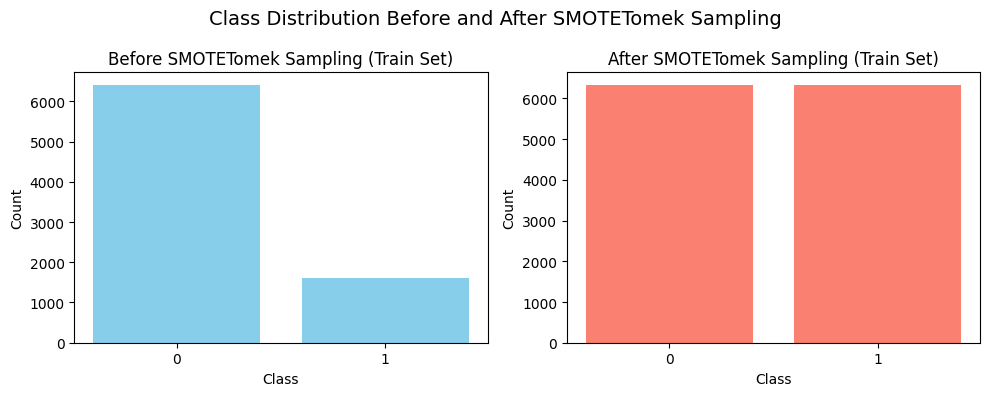

In [54]:
from imblearn.combine import SMOTETomek

# Perform random sampling
smotetomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(X_train, y_train)

print("Before SMOTETomek Sampling:")
print(y_train.value_counts(), "\n")
print("\nAfter SMOTETomek Sampling:")
print(y_resampled.value_counts())
print("\nPercentages after SMOTETomek Sampling:")
print(y_resampled.value_counts(normalize=True) * 100)

before_counts = y_train.value_counts()
after_counts = y_resampled.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(before_counts.index.astype(str), before_counts.values, color="skyblue")
axes[0].set_title("Before SMOTETomek Sampling (Train Set)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# After SMOTETomek Sampling
axes[1].bar(after_counts.index.astype(str), after_counts.values, color="salmon")
axes[1].set_title("After SMOTETomek Sampling (Train Set)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.suptitle("Class Distribution Before and After SMOTETomek Sampling", fontsize=14)
plt.tight_layout()
plt.show()

## Scaler

In [55]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train_resampled = scaler.transform(X_resampled)
X_test = scaler.transform(X_test)

# 9.0 Train and Test Model

In [56]:
def model_prediction(model_normal, model_tuned, X_train, y_train, X_test, y_test):
    y_train_pred_normal = model_normal.predict(X_train)
    y_test_pred_normal = model_normal.predict(X_test)
    y_train_pred_tuned = model_tuned.predict(X_train)
    y_test_pred_tuned = model_tuned.predict(X_test)

    return y_train_pred_normal, y_test_pred_normal, y_train_pred_tuned, y_test_pred_tuned


def evaluate_acc_model(y_train, y_test, y_train_pred_normal, y_test_pred_normal, y_train_pred_tuned, y_test_pred_tuned):

    acc_train_normal = accuracy_score(y_train, y_train_pred_normal)
    acc_test_normal = accuracy_score(y_test, y_test_pred_normal)
    acc_train_tuned = accuracy_score(y_train, y_train_pred_tuned)
    acc_test_tuned = accuracy_score(y_test, y_test_pred_tuned)

    return {
        "acc_train_normal": acc_train_normal,
        "acc_test_normal": acc_test_normal,
        "acc_train_tuned": acc_train_tuned,
        "acc_test_tuned": acc_test_tuned
    }

def display_acc_model(name:str, y_test, y_test_pred_normal, y_test_pred_tuned, acc_results:dict):
    print(f"Accuracy Results for {name}:")
    print(f"Training Accuracy (Normal): {acc_results['acc_train_normal']:.4f}")
    print(f"Testing Accuracy (Normal): {acc_results['acc_test_normal']:.4f}")
    print(f"Training Accuracy (Tuned): {acc_results['acc_train_tuned']:.4f}")
    print(f"Testing Accuracy (Tuned): {acc_results['acc_test_tuned']:.4f}")
    print("\nClassification Report (WITH Hyperparameter Tuning):")
    print(classification_report(y_test, y_test_pred_tuned))
    print("\nClassification Report (WITHOUT Hyperparameter Tuning):")
    print(classification_report(y_test, y_test_pred_normal))

def plot_cm_model(name:str, y_test, y_test_pred_normal, y_test_pred_tuned):
    cm_normal = confusion_matrix(y_test, y_test_pred_normal)
    cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm_tuned, annot=True, fmt='d', cmap="Blues", cbar=False, ax=ax[0])
    ax[0].set_title(f"{name} (With Hyperparameter Tuning)")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")

    sns.heatmap(cm_normal, annot=True, fmt='d', cmap="Greens", cbar=False, ax=ax[1])
    ax[1].set_title(f"{name} (Without Hyperparameter Tuning)")
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }


## 9.1 Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


rf_param_grid = {
    "n_estimators": [100, 300, 500, 1000],   # number of trees
    "max_depth": [10, 30, 50],         # depth of each tree
    "min_samples_split": [2, 5, 10],         # min samples required to split
    "min_samples_leaf": [1, 2, 4],           # min samples per leaf node
    "max_features": ["sqrt", "log2"]        # features considered at each spli
}

rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

with Timer() as rf_gs_timer:
    rf_gridsearch.fit(X_train_resampled, y_resampled)

best_rf = rf_gridsearch.best_estimator_

rf_normal = RandomForestClassifier(random_state=42)

with Timer() as rf_normal_timer:
    rf_normal.fit(X_train_resampled, y_resampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [58]:
print("Random Forest Classifier Tunning Results:")
print("\nBest CV score", rf_gridsearch.best_score_)
print("Best Params:", rf_gridsearch.best_params_)

Random Forest Classifier Tunning Results:

Best CV score 0.7691992483726722
Best Params: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


Accuracy Results for Random Forest:
Training Accuracy (Normal): 0.9936
Testing Accuracy (Normal): 0.7230
Training Accuracy (Tuned): 0.9939
Testing Accuracy (Tuned): 0.7210

Classification Report (WITH Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1600
           1       0.21      0.14      0.16       400

    accuracy                           0.72      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.72      0.70      2000


Classification Report (WITHOUT Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1600
           1       0.20      0.13      0.16       400

    accuracy                           0.72      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.72      0.70      2000



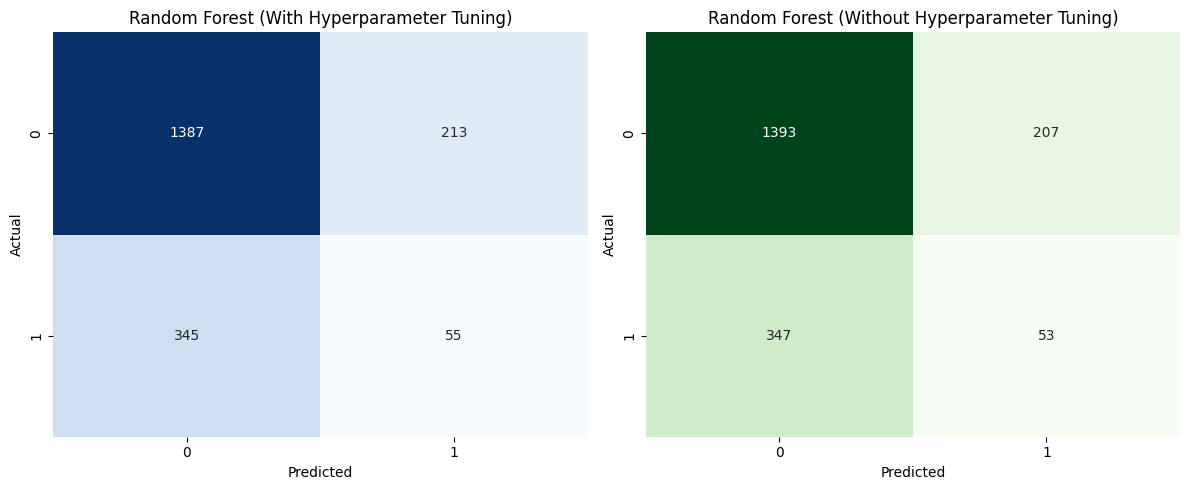

In [59]:
y_pred_rf_normal_train, y_pred_rf_normal_test,  y_pred_rf_tuned_train, y_pred_rf_tuned_test = model_prediction(rf_normal,best_rf, X_train, y_train, X_test, y_test)
rf_acc_result = evaluate_acc_model(y_train, y_test, y_pred_rf_normal_train, y_pred_rf_normal_test, y_pred_rf_tuned_train, y_pred_rf_tuned_test)
display_acc_model("Random Forest", y_test, y_pred_rf_normal_test, y_pred_rf_tuned_test, rf_acc_result)
plot_cm_model("Random Forest", y_test, y_pred_rf_normal_test, y_pred_rf_tuned_test)

## 9.2 Logistic Regression

In [60]:

lr = LogisticRegression(random_state=42)

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga']     # Solvers that support l1 and l2
}

lr_gridsearch = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

with Timer() as lr_gs_timer:
    lr_gridsearch.fit(X_train_resampled, y_resampled)
best_lr = lr_gridsearch.best_estimator_
lr_normal = LogisticRegression(random_state=42)
with Timer() as lr_normal_timer:
    lr_normal.fit(X_train_resampled, y_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
print("Logistic Regression Tunning Results:")
print("\nBest CV score", lr_gridsearch.best_score_)
print("Best Params:", lr_gridsearch.best_params_)

Logistic Regression Tunning Results:

Best CV score 0.6926336319241155
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


Accuracy Results for Logistic Regression:
Training Accuracy (Normal): 0.6299
Testing Accuracy (Normal): 0.6285
Training Accuracy (Tuned): 0.6308
Testing Accuracy (Tuned): 0.6275

Classification Report (WITH Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1600
           1       0.21      0.31      0.25       400

    accuracy                           0.63      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.69      0.63      0.65      2000


Classification Report (WITHOUT Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1600
           1       0.21      0.31      0.25       400

    accuracy                           0.63      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.69      0.63      0.65      2000



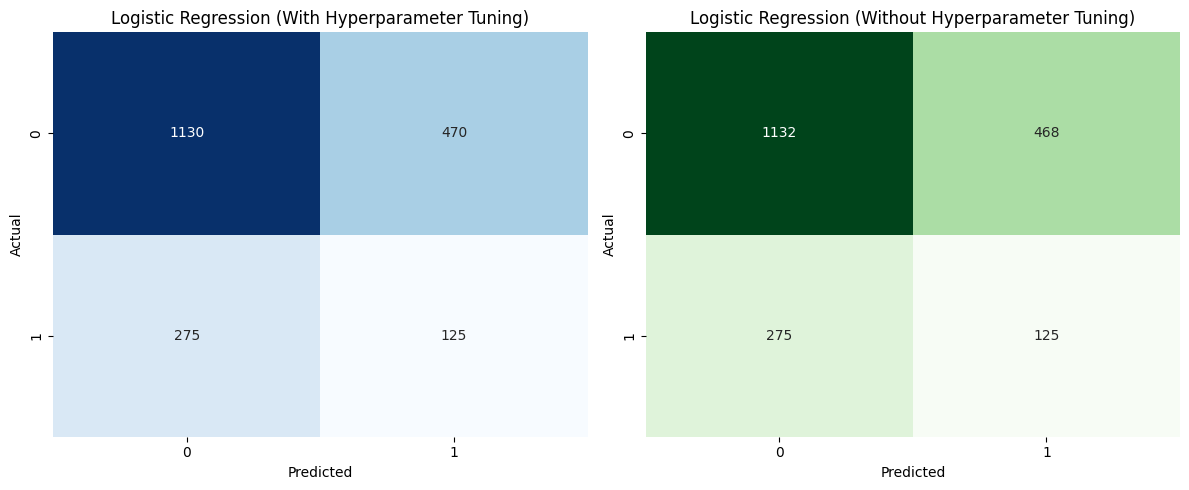

In [62]:
y_pred_lr_normal_trained, y_pred_lr_normal_test, y_pred_lr_tuned_trained, y_pred_lr_tuned_test,= model_prediction(lr_normal, best_lr, X_train, y_train, X_test, y_test)

# Evaluation
acc_results = evaluate_acc_model(y_train, y_test, y_pred_lr_normal_trained, y_pred_lr_normal_test, y_pred_lr_tuned_trained, y_pred_lr_tuned_test)
display_acc_model("Logistic Regression", y_test, y_pred_lr_normal_test, y_pred_lr_tuned_test, acc_results)

# Confusion Matrices
plot_cm_model("Logistic Regression", y_test, y_pred_lr_normal_test, y_pred_lr_tuned_test)

## 9.3 Naive Bayes

In [63]:
# Naive Bayes Classifier
nb_normal = GaussianNB()
with Timer() as nb_normal_timer:
    nb_normal.fit(X_train_resampled, y_resampled)


nb = GaussianNB()
nb_param_grid = {'var_smoothing': np.logspace(-9, -1, 10)}

nb_gridsearch = GridSearchCV(nb, nb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

with Timer() as nb_gs_timer:
    nb_gridsearch.fit(X_train_resampled, y_resampled)

best_nb = nb_gridsearch.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [64]:
print("Naive Bayes Classifier Tunning Results:")
print("\nBest CV score", nb_gridsearch.best_score_)
print("Best Params:", nb_gridsearch.best_params_)

Naive Bayes Classifier Tunning Results:

Best CV score 0.7361264822134388
Best Params: {'var_smoothing': np.float64(0.0016681005372000558)}


Accuracy Results for Naive Bayes:
Training Accuracy (Normal): 0.6482
Testing Accuracy (Normal): 0.6440
Training Accuracy (Tuned): 0.6471
Testing Accuracy (Tuned): 0.6415

Classification Report (WITH Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1600
           1       0.20      0.27      0.23       400

    accuracy                           0.64      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.64      0.66      2000


Classification Report (WITHOUT Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1600
           1       0.20      0.27      0.23       400

    accuracy                           0.64      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.64      0.66      2000



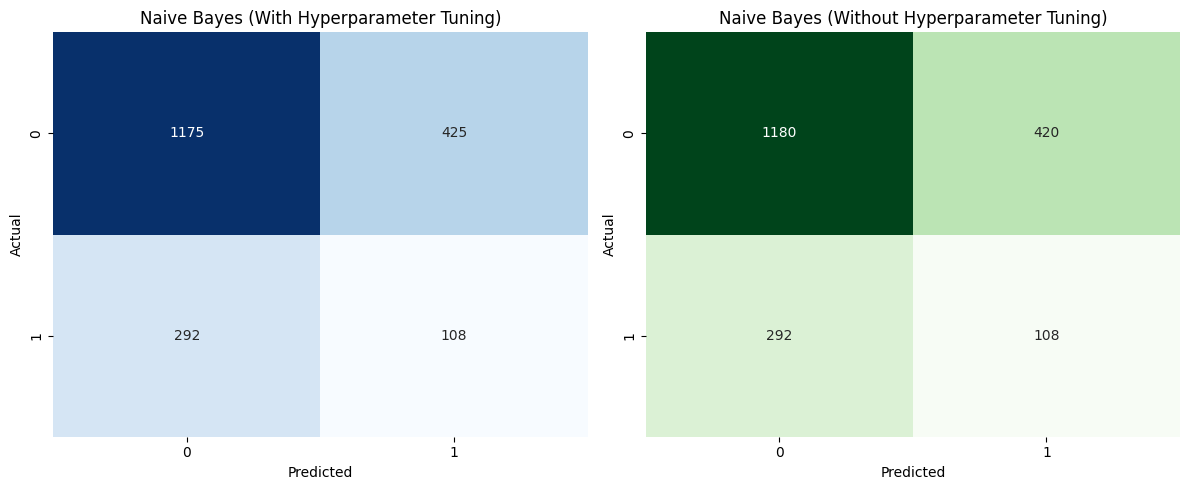

In [65]:
y_pred_nb_normal_train, y_pred_nb_normal_test, y_pred_nb_tuned_train, y_pred_nb_tuned_test = model_prediction(nb_normal, best_nb, X_train, y_train, X_test, y_test)

# Evaluation
acc_results = evaluate_acc_model(y_train, y_test, y_pred_nb_normal_train, y_pred_nb_normal_test, y_pred_nb_tuned_train, y_pred_nb_tuned_test)
display_acc_model("Naive Bayes", y_test, y_pred_nb_normal_test, y_pred_nb_tuned_test, acc_results)
# Confusion Matrices
plot_cm_model("Naive Bayes", y_test, y_pred_nb_normal_test, y_pred_nb_tuned_test)

## 9.4 XGBoost

In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


xgb_normal = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)
with Timer() as xgb_normal_timer:
    xgb_normal.fit(X_train_resampled, y_resampled)


xgb = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_gridsearch = GridSearchCV(
    estimator=xgb, 
    param_grid=xgb_param_grid, 
    cv=5, 
    scoring='f1',
    n_jobs=-1, 
    verbose=2
)
with Timer() as xgb_gs_timer:
    xgb_gridsearch.fit(X_train_resampled, y_resampled)
best_xgb = xgb_gridsearch.best_estimator_

c:\Users\laoli\OneDrive\Desktop\latest_version\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\laoli\OneDrive\Desktop\latest_version\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:29:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [67]:
print("XGBoost Classifier Tunning Results:")
print("\nBest CV score", xgb_gridsearch.best_score_)
print("Best Params:", xgb_gridsearch.best_params_)

XGBoost Classifier Tunning Results:

Best CV score 0.7861701306782966
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


Accuracy Results for XGBoost:
Training Accuracy (Normal): 0.9211
Testing Accuracy (Normal): 0.7025
Training Accuracy (Tuned): 0.9892
Testing Accuracy (Tuned): 0.7115

Classification Report (WITH Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1600
           1       0.20      0.15      0.17       400

    accuracy                           0.71      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.71      0.69      2000


Classification Report (WITHOUT Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1600
           1       0.22      0.19      0.21       400

    accuracy                           0.70      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.69      0.70      0.69      2000



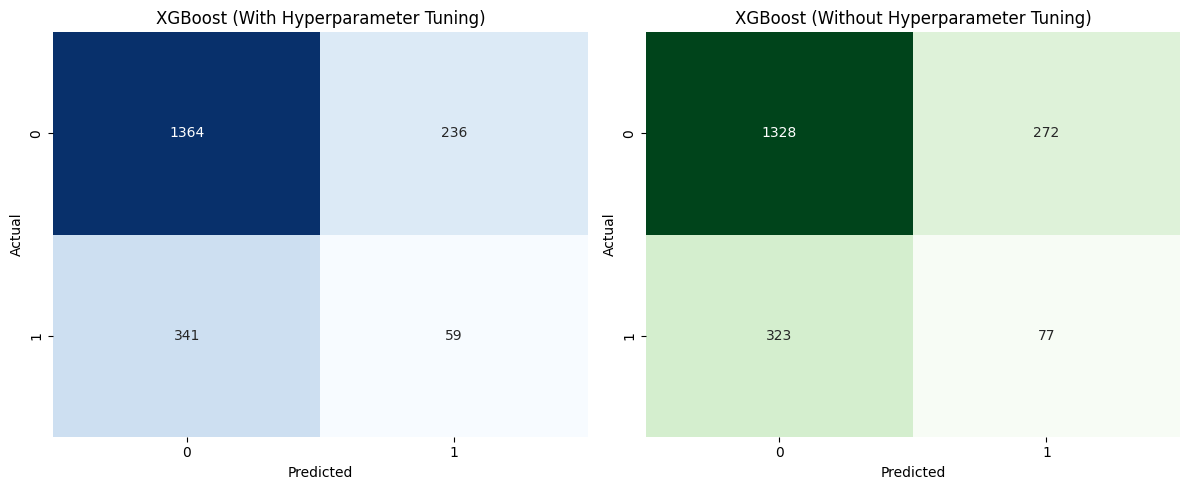

In [68]:
y_pred_xgb_normal_train, y_pred_xgb_normal_test, y_pred_xgb_tuned_train, y_pred_xgb_tuned_test = model_prediction(xgb_normal, best_xgb, X_train, y_train, X_test, y_test)
# Evaluation
acc_results = evaluate_acc_model(y_train, y_test, y_pred_xgb_normal_train, y_pred_xgb_normal_test, y_pred_xgb_tuned_train, y_pred_xgb_tuned_test)
display_acc_model("XGBoost", y_test, y_pred_xgb_normal_test, y_pred_xgb_tuned_test, acc_results)
# Confusion Matrices
plot_cm_model("XGBoost", y_test, y_pred_xgb_normal_test, y_pred_xgb_tuned_test)

## 9.5 ANN  

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [70]:
def create_ann_model(input_shape, neurons_layer1=64, neurons_layer2=32, dropout_rate=0.5, 
                                learning_rate=0.001, activation='relu'):
    
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(neurons_layer1, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall', 'accuracy'])
    return model

In [71]:
ann_normal = KerasClassifier(
    model=create_ann_model,
    input_shape=(X_train_resampled.shape[1],),
    neurons_layer1=64,
    neurons_layer2=32,
    dropout_rate=0.2,
    learning_rate=0.001,
    activation='relu',
    epochs=30,
    batch_size=32,
    verbose=0
)


ann_param_grid = {
    'neurons_layer1': [32, 64],           # First hidden layer neurons
    'neurons_layer2': [16, 32],            # Second hidden layer neurons
    'dropout_rate': [0.1, 0.2, 0.5]          # Dropout rate
}


ann_gridsearch = GridSearchCV(
    estimator=ann_normal,
    param_grid=ann_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=1,  # Use 1 job for Keras models to avoid conflicts
    verbose=2,
    return_train_score=True
)

ann_normal = KerasClassifier(
    model=create_ann_model,
    input_shape=(X_train_resampled.shape[1],),
    neurons_layer1=64,
    neurons_layer2=32,
    dropout_rate=0.2,
    learning_rate=0.001,
    activation='relu',
    epochs=30,
    batch_size=32,
    verbose=0
)

with Timer() as ann_gs_timer:
    ann_gridsearch.fit(X_train_resampled, y_resampled)

with Timer() as ann_normal_timer:
    ann_normal.fit(X_train_resampled, y_resampled)

best_ann = ann_gridsearch.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=16; total time=  51.3s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=16; total time=  55.2s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=16; total time=  49.3s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=16; total time=  55.8s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=16; total time=  51.9s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=32; total time=  46.9s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=32; total time=  44.4s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=32; total time=  43.6s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=32; total time=  43.4s
[CV] END dropout_rate=0.1, neurons_layer1=32, neurons_layer2=32; total time=  52.3s
[CV] END dropout_rate=0.1, neurons_layer1=64, neurons_layer2=16; total time=  54.3s
[CV] END dropou

In [72]:
print("ANN Tunning Results:")
print("\nBest CV score", ann_gridsearch.best_score_)
print("Best Params:", ann_gridsearch.best_params_)

ANN Tunning Results:

Best CV score 0.478901168375485
Best Params: {'dropout_rate': 0.1, 'neurons_layer1': 64, 'neurons_layer2': 32}


Accuracy Results for ANN:
Training Accuracy (Normal): 0.7051
Testing Accuracy (Normal): 0.6665
Training Accuracy (Tuned): 0.7396
Testing Accuracy (Tuned): 0.7040

Classification Report (WITH Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1600
           1       0.20      0.17      0.18       400

    accuracy                           0.70      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.70      0.69      2000


Classification Report (WITHOUT Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1600
           1       0.19      0.20      0.19       400

    accuracy                           0.67      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.67      0.67      0.67      2000



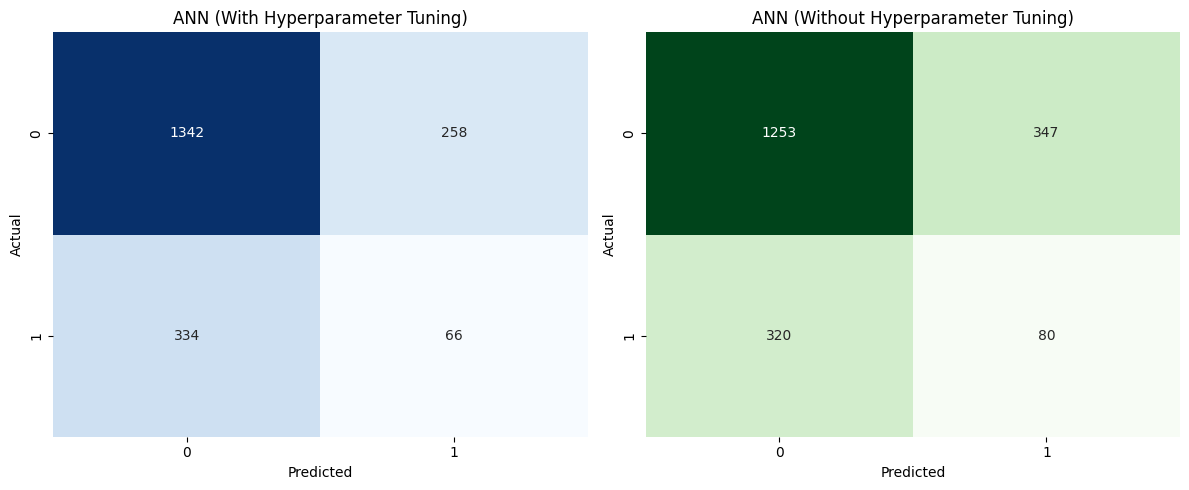

In [73]:
y_pred_ann_normal_train, y_pred_ann_normal_test, y_pred_ann_tuned_train, y_pred_ann_tuned_test = model_prediction(ann_normal, best_ann, X_train, y_train, X_test, y_test)
# Evaluation
acc_results = evaluate_acc_model(y_train, y_test, y_pred_ann_normal_train, y_pred_ann_normal_test, y_pred_ann_tuned_train, y_pred_ann_tuned_test)
display_acc_model("ANN", y_test, y_pred_ann_normal_test, y_pred_ann_tuned_test, acc_results)
# Confusion Matrices
plot_cm_model("ANN", y_test, y_pred_ann_normal_test, y_pred_ann_tuned_test)

# 10.0 Evaluation

In [74]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store tuned model information
tuned_results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Dictionary to store normal model information
normal_results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Dictionary for final comparison of all models
comparison_results = {
    'Model': [],
    'Type': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# 1. Random Forest
# Normal model
rf_normal_train_acc = accuracy_score(y_train, y_pred_rf_normal_train)
rf_normal_test_acc = accuracy_score(y_test, y_pred_rf_normal_test)
rf_normal_precision = precision_score(y_test, y_pred_rf_normal_test)
rf_normal_recall = recall_score(y_test, y_pred_rf_normal_test)
rf_normal_f1 = f1_score(y_test, y_pred_rf_normal_test)

normal_results['Model'].append('Random Forest')
normal_results['Train Accuracy'].append(rf_normal_train_acc)
normal_results['Test Accuracy'].append(rf_normal_test_acc)
normal_results['Precision'].append(rf_normal_precision)
normal_results['Recall'].append(rf_normal_recall)
normal_results['F1 Score'].append(rf_normal_f1)

# Tuned model
rf_tuned_train_acc = accuracy_score(y_train, y_pred_rf_tuned_train)
rf_tuned_test_acc = accuracy_score(y_test, y_pred_rf_tuned_test)
rf_tuned_precision = precision_score(y_test, y_pred_rf_tuned_test)
rf_tuned_recall = recall_score(y_test, y_pred_rf_tuned_test)
rf_tuned_f1 = f1_score(y_test, y_pred_rf_tuned_test)

tuned_results['Model'].append('Random Forest')
tuned_results['Train Accuracy'].append(rf_tuned_train_acc)
tuned_results['Test Accuracy'].append(rf_tuned_test_acc)
tuned_results['Precision'].append(rf_tuned_precision)
tuned_results['Recall'].append(rf_tuned_recall)
tuned_results['F1 Score'].append(rf_tuned_f1)

# Add to comparison table
comparison_results['Model'].append('Random Forest')
comparison_results['Type'].append('Normal')
comparison_results['Test Accuracy'].append(rf_normal_test_acc)
comparison_results['Precision'].append(rf_normal_precision)
comparison_results['Recall'].append(rf_normal_recall)
comparison_results['F1 Score'].append(rf_normal_f1)

comparison_results['Model'].append('Random Forest')
comparison_results['Type'].append('Tuned')
comparison_results['Test Accuracy'].append(rf_tuned_test_acc)
comparison_results['Precision'].append(rf_tuned_precision)
comparison_results['Recall'].append(rf_tuned_recall)
comparison_results['F1 Score'].append(rf_tuned_f1)

# 2. Logistic Regression
# Normal model
lr_normal_train_acc = accuracy_score(y_train, y_pred_lr_normal_trained)
lr_normal_test_acc = accuracy_score(y_test, y_pred_lr_normal_test)
lr_normal_precision = precision_score(y_test, y_pred_lr_normal_test)
lr_normal_recall = recall_score(y_test, y_pred_lr_normal_test)
lr_normal_f1 = f1_score(y_test, y_pred_lr_normal_test)

normal_results['Model'].append('Logistic Regression')
normal_results['Train Accuracy'].append(lr_normal_train_acc)
normal_results['Test Accuracy'].append(lr_normal_test_acc)
normal_results['Precision'].append(lr_normal_precision)
normal_results['Recall'].append(lr_normal_recall)
normal_results['F1 Score'].append(lr_normal_f1)

# Tuned model
lr_tuned_train_acc = accuracy_score(y_train, y_pred_lr_tuned_trained)
lr_tuned_test_acc = accuracy_score(y_test, y_pred_lr_tuned_test)
lr_tuned_precision = precision_score(y_test, y_pred_lr_tuned_test)
lr_tuned_recall = recall_score(y_test, y_pred_lr_tuned_test)
lr_tuned_f1 = f1_score(y_test, y_pred_lr_tuned_test)

tuned_results['Model'].append('Logistic Regression')
tuned_results['Train Accuracy'].append(lr_tuned_train_acc)
tuned_results['Test Accuracy'].append(lr_tuned_test_acc)
tuned_results['Precision'].append(lr_tuned_precision)
tuned_results['Recall'].append(lr_tuned_recall)
tuned_results['F1 Score'].append(lr_tuned_f1)

# Add to comparison table
comparison_results['Model'].append('Logistic Regression')
comparison_results['Type'].append('Normal')
comparison_results['Test Accuracy'].append(lr_normal_test_acc)
comparison_results['Precision'].append(lr_normal_precision)
comparison_results['Recall'].append(lr_normal_recall)
comparison_results['F1 Score'].append(lr_normal_f1)

comparison_results['Model'].append('Logistic Regression')
comparison_results['Type'].append('Tuned')
comparison_results['Test Accuracy'].append(lr_tuned_test_acc)
comparison_results['Precision'].append(lr_tuned_precision)
comparison_results['Recall'].append(lr_tuned_recall)
comparison_results['F1 Score'].append(lr_tuned_f1)

# 3. Naive Bayes
# Normal model
nb_normal_train_acc = accuracy_score(y_train, y_pred_nb_normal_train)
nb_normal_test_acc = accuracy_score(y_test, y_pred_nb_normal_test)
nb_normal_precision = precision_score(y_test, y_pred_nb_normal_test)
nb_normal_recall = recall_score(y_test, y_pred_nb_normal_test)
nb_normal_f1 = f1_score(y_test, y_pred_nb_normal_test)

normal_results['Model'].append('Naive Bayes')
normal_results['Train Accuracy'].append(nb_normal_train_acc)
normal_results['Test Accuracy'].append(nb_normal_test_acc)
normal_results['Precision'].append(nb_normal_precision)
normal_results['Recall'].append(nb_normal_recall)
normal_results['F1 Score'].append(nb_normal_f1)

# Tuned model
nb_tuned_train_acc = accuracy_score(y_train, y_pred_nb_tuned_train)
nb_tuned_test_acc = accuracy_score(y_test, y_pred_nb_tuned_test)
nb_tuned_precision = precision_score(y_test, y_pred_nb_tuned_test)
nb_tuned_recall = recall_score(y_test, y_pred_nb_tuned_test)
nb_tuned_f1 = f1_score(y_test, y_pred_nb_tuned_test)

tuned_results['Model'].append('Naive Bayes')
tuned_results['Train Accuracy'].append(nb_tuned_train_acc)
tuned_results['Test Accuracy'].append(nb_tuned_test_acc)
tuned_results['Precision'].append(nb_tuned_precision)
tuned_results['Recall'].append(nb_tuned_recall)
tuned_results['F1 Score'].append(nb_tuned_f1)

# Add to comparison table
comparison_results['Model'].append('Naive Bayes')
comparison_results['Type'].append('Normal')
comparison_results['Test Accuracy'].append(nb_normal_test_acc)
comparison_results['Precision'].append(nb_normal_precision)
comparison_results['Recall'].append(nb_normal_recall)
comparison_results['F1 Score'].append(nb_normal_f1)

comparison_results['Model'].append('Naive Bayes')
comparison_results['Type'].append('Tuned')
comparison_results['Test Accuracy'].append(nb_tuned_test_acc)
comparison_results['Precision'].append(nb_tuned_precision)
comparison_results['Recall'].append(nb_tuned_recall)
comparison_results['F1 Score'].append(nb_tuned_f1)

# 4. XGBoost
# Normal model
xgb_normal_train_acc = accuracy_score(y_train, y_pred_xgb_normal_train)
xgb_normal_test_acc = accuracy_score(y_test, y_pred_xgb_normal_test)
xgb_normal_precision = precision_score(y_test, y_pred_xgb_normal_test)
xgb_normal_recall = recall_score(y_test, y_pred_xgb_normal_test)
xgb_normal_f1 = f1_score(y_test, y_pred_xgb_normal_test)

normal_results['Model'].append('XGBoost')
normal_results['Train Accuracy'].append(xgb_normal_train_acc)
normal_results['Test Accuracy'].append(xgb_normal_test_acc)
normal_results['Precision'].append(xgb_normal_precision)
normal_results['Recall'].append(xgb_normal_recall)
normal_results['F1 Score'].append(xgb_normal_f1)

# Tuned model
xgb_tuned_train_acc = accuracy_score(y_train, y_pred_xgb_tuned_train)
xgb_tuned_test_acc = accuracy_score(y_test, y_pred_xgb_tuned_test)
xgb_tuned_precision = precision_score(y_test, y_pred_xgb_tuned_test)
xgb_tuned_recall = recall_score(y_test, y_pred_xgb_tuned_test)
xgb_tuned_f1 = f1_score(y_test, y_pred_xgb_tuned_test)

tuned_results['Model'].append('XGBoost')
tuned_results['Train Accuracy'].append(xgb_tuned_train_acc)
tuned_results['Test Accuracy'].append(xgb_tuned_test_acc)
tuned_results['Precision'].append(xgb_tuned_precision)
tuned_results['Recall'].append(xgb_tuned_recall)
tuned_results['F1 Score'].append(xgb_tuned_f1)

# Add to comparison table
comparison_results['Model'].append('XGBoost')
comparison_results['Type'].append('Normal')
comparison_results['Test Accuracy'].append(xgb_normal_test_acc)
comparison_results['Precision'].append(xgb_normal_precision)
comparison_results['Recall'].append(xgb_normal_recall)
comparison_results['F1 Score'].append(xgb_normal_f1)

comparison_results['Model'].append('XGBoost')
comparison_results['Type'].append('Tuned')
comparison_results['Test Accuracy'].append(xgb_tuned_test_acc)
comparison_results['Precision'].append(xgb_tuned_precision)
comparison_results['Recall'].append(xgb_tuned_recall)
comparison_results['F1 Score'].append(xgb_tuned_f1)

# 5. ANN
# Normal model
ann_normal_train_acc = accuracy_score(y_train, y_pred_ann_normal_train)
ann_normal_test_acc = accuracy_score(y_test, y_pred_ann_normal_test)
ann_normal_precision = precision_score(y_test, y_pred_ann_normal_test)
ann_normal_recall = recall_score(y_test, y_pred_ann_normal_test)
ann_normal_f1 = f1_score(y_test, y_pred_ann_normal_test)
normal_results['Model'].append('ANN')
normal_results['Train Accuracy'].append(ann_normal_train_acc)
normal_results['Test Accuracy'].append(ann_normal_test_acc)
normal_results['Precision'].append(ann_normal_precision)
normal_results['Recall'].append(ann_normal_recall)
normal_results['F1 Score'].append(ann_normal_f1)
# Tuned model
ann_tuned_train_acc = accuracy_score(y_train, y_pred_ann_tuned_train)
ann_tuned_test_acc = accuracy_score(y_test, y_pred_ann_tuned_test)
ann_tuned_precision = precision_score(y_test, y_pred_ann_tuned_test)
ann_tuned_recall = recall_score(y_test, y_pred_ann_tuned_test)
ann_tuned_f1 = f1_score(y_test, y_pred_ann_tuned_test)
tuned_results['Model'].append('ANN')
tuned_results['Train Accuracy'].append(ann_tuned_train_acc)
tuned_results['Test Accuracy'].append(ann_tuned_test_acc)
tuned_results['Precision'].append(ann_tuned_precision)
tuned_results['Recall'].append(ann_tuned_recall)
tuned_results['F1 Score'].append(ann_tuned_f1)
# Add to comparison table
comparison_results['Model'].append('ANN')
comparison_results['Type'].append('Normal')
comparison_results['Test Accuracy'].append(ann_normal_test_acc)
comparison_results['Precision'].append(ann_normal_precision)
comparison_results['Recall'].append(ann_normal_recall)
comparison_results['F1 Score'].append(ann_normal_f1)
comparison_results['Model'].append('ANN')
comparison_results['Type'].append('Tuned')
comparison_results['Test Accuracy'].append(ann_tuned_test_acc)
comparison_results['Precision'].append(ann_tuned_precision)
comparison_results['Recall'].append(ann_tuned_recall)
comparison_results['F1 Score'].append(ann_tuned_f1)




# Create DataFrames from the results
tuned_df = pd.DataFrame(tuned_results)
normal_df = pd.DataFrame(normal_results)
comparison_df = pd.DataFrame(comparison_results)

# Sort by test accuracy (descending)
tuned_df = tuned_df.sort_values(by='Test Accuracy', ascending=False)
normal_df = normal_df.sort_values(by='Test Accuracy', ascending=False)
tuned_df['Overfitting'] = tuned_df['Train Accuracy'] - tuned_df['Test Accuracy']
normal_df['Overfitting'] = normal_df['Train Accuracy'] - normal_df['Test Accuracy']


comparison_df = comparison_df.sort_values(by='Model', ascending=False)

# Format float values to 4 decimal places
for df in [tuned_df, normal_df, comparison_df]:
    float_cols = df.select_dtypes(include=['float64']).columns
    for col in float_cols:
        df[col] = df[col].map(lambda x: f"{x:.4f}")



In [75]:
print("\n====== TUNED MODELS PERFORMANCE ======")
print(tuned_df.to_string(index=False))

print("\n\n====== NORMAL MODELS PERFORMANCE ======")
print(normal_df.to_string(index=False))

print("\n\n====== ALL MODELS COMPARISON ======")
print(comparison_df.to_string(index=False))



====== TUNED MODELS PERFORMANCE ======
              Model Train Accuracy Test Accuracy Precision Recall F1 Score Overfitting
      Random Forest         0.9939        0.7210    0.2052 0.1375   0.1647      0.2729
            XGBoost         0.9892        0.7115    0.2000 0.1475   0.1698      0.2777
                ANN         0.7396        0.7040    0.2037 0.1650   0.1823      0.0356
        Naive Bayes         0.6471        0.6415    0.2026 0.2700   0.2315      0.0056
Logistic Regression         0.6308        0.6275    0.2101 0.3125   0.2513      0.0033


====== NORMAL MODELS PERFORMANCE ======
              Model Train Accuracy Test Accuracy Precision Recall F1 Score Overfitting
      Random Forest         0.9936        0.7230    0.2038 0.1325   0.1606      0.2706
            XGBoost         0.9211        0.7025    0.2206 0.1925   0.2056      0.2186
                ANN         0.7051        0.6665    0.1874 0.2000   0.1935      0.0386
        Naive Bayes         0.6482        0.6440

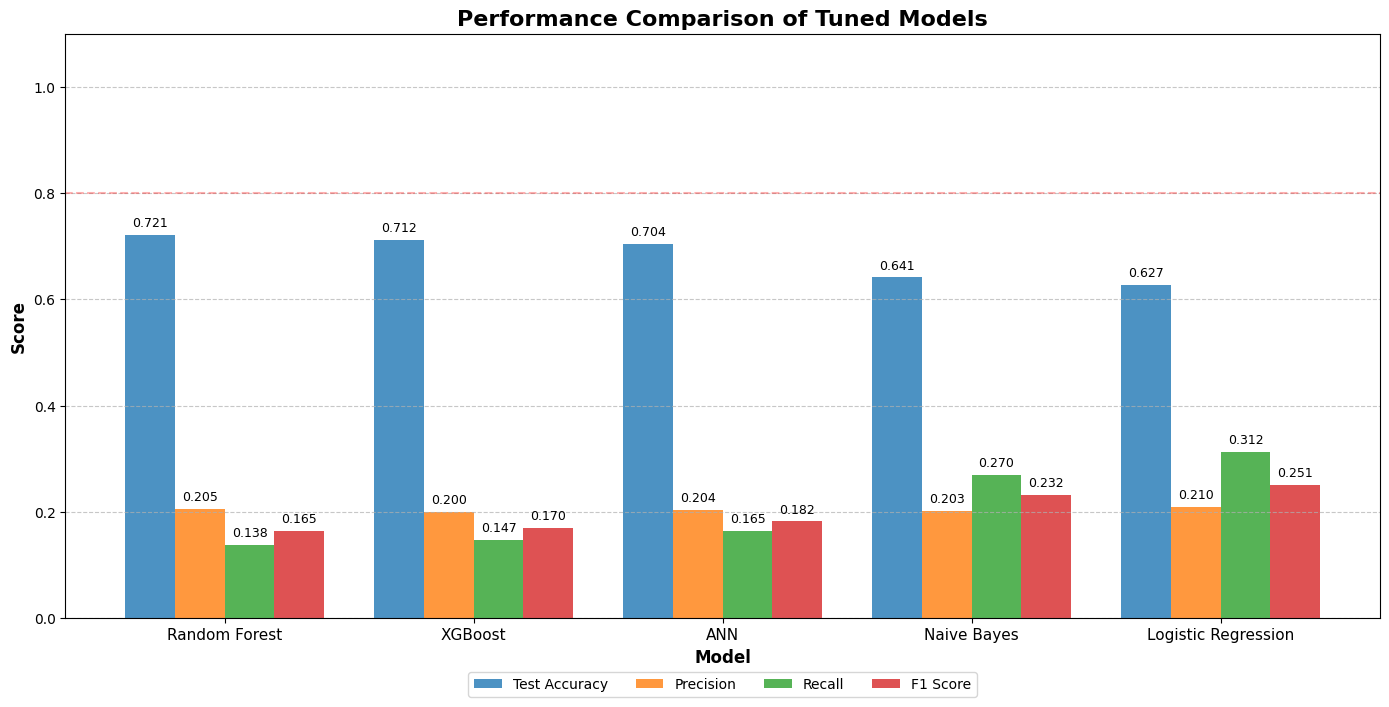

In [76]:
# Convert string metrics back to float for plotting
plot_df = tuned_df.copy()
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1 Score']
for col in metrics:
    plot_df[col] = plot_df[col].astype(float)

# Set up the figure
plt.figure(figsize=(14, 8))

# Set width of bars
bar_width = 0.2
index = np.arange(len(plot_df['Model']))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(index + i*bar_width, plot_df[metric], bar_width, 
            label=metric, alpha=0.8)
    
    # Add value labels on top of each bar
    for j, value in enumerate(plot_df[metric]):
        plt.text(index[j] + i*bar_width, value + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', 
                 rotation=0, fontsize=9)

# Customize the plot
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Score', fontweight='bold', fontsize=12)
plt.title('Performance Comparison of Tuned Models', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width*1.5, plot_df['Model'], fontsize=11)
plt.ylim(0, 1.1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=10)

# Add a horizontal line for reference at 0.8
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

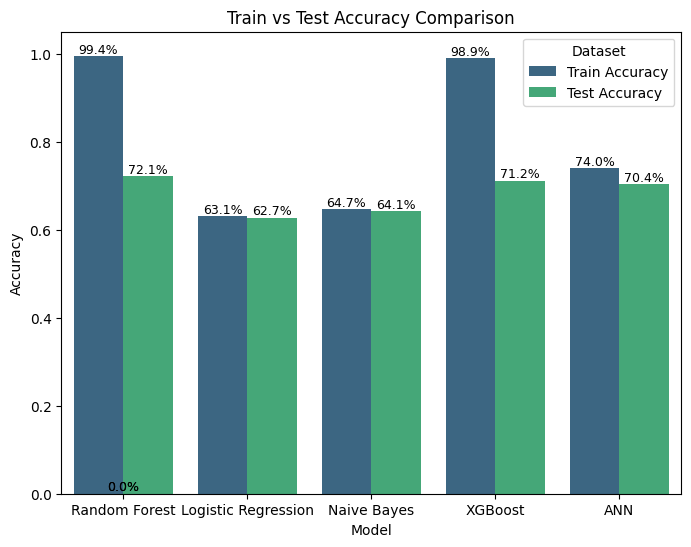

In [77]:
#Evaluation of Train vs Test Accuracy for all models
models = {
    "Random Forest": best_rf,
    "Logistic Regression": best_lr,
    "Naive Bayes": best_nb,
    "XGBoost": best_xgb,
    "ANN": best_ann
}

# Collect train vs test accuracy
acc_results = []
for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    acc_results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred)
    })

# Convert to DataFrame
acc_df = pd.DataFrame(acc_results)

# ---- Plot comparison ----
plt.figure(figsize=(8,6))
acc_melted = acc_df.melt(id_vars="Model", var_name="Dataset", value_name="Accuracy")
ax = sns.barplot(data=acc_melted, x="Model", y="Accuracy", hue="Dataset", palette="viridis")

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title("Train vs Test Accuracy Comparison")
plt.ylim(0,1.05)
plt.ylabel("Accuracy")
plt.legend(title="Dataset")
plt.show()


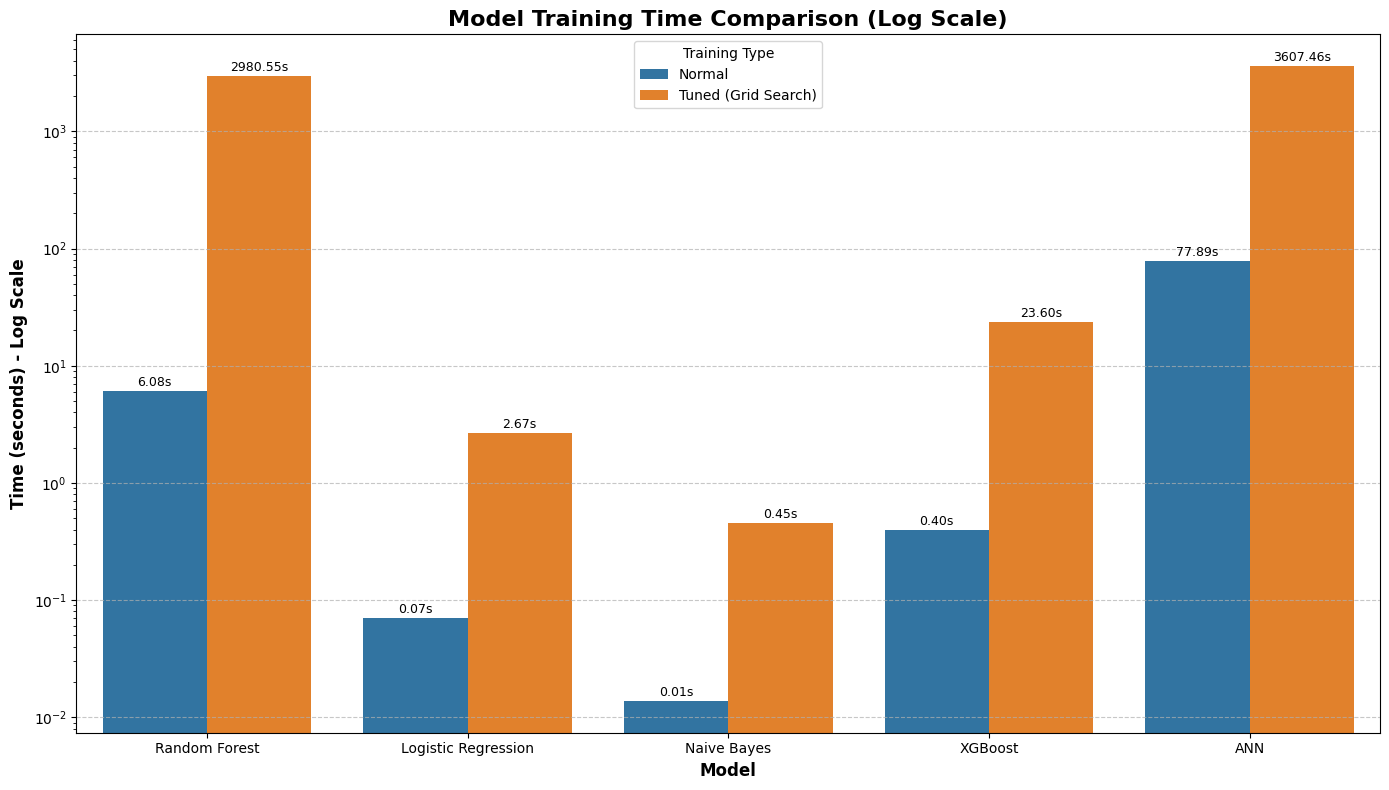

In [78]:
# Evaluate Model Training Time
training_times = {
    'Model': ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'XGBoost', 'ANN'],
    'Normal': [rf_normal_timer.elapsed, lr_normal_timer.elapsed, nb_normal_timer.elapsed, xgb_normal_timer.elapsed, ann_normal_timer.elapsed],
    'Tuned (Grid Search)': [rf_gs_timer.elapsed, lr_gs_timer.elapsed, nb_gs_timer.elapsed, xgb_gs_timer.elapsed, ann_gs_timer.elapsed]
}

# Convert to DataFrame
time_df = pd.DataFrame(training_times)


# Log scale visualization
plt.figure(figsize=(14, 8))
time_df_melted = pd.melt(time_df, id_vars=['Model'], var_name='Type', value_name='Time (seconds)')
ax = sns.barplot(x='Model', y='Time (seconds)', hue='Type', data=time_df_melted)

# Add time labels on top of each bar with original values (not the epsilon-adjusted ones)
for i, model in enumerate(training_times['Model']):
    # Normal training bar
    ax.text(i - 0.2, time_df['Normal'][i] * 1.1, 
            f"{training_times['Normal'][i]:.2f}s",
            ha="center", fontsize=9)
    
    # Tuned training bar
    ax.text(i + 0.2, time_df['Tuned (Grid Search)'][i] * 1.1,
            f"{training_times['Tuned (Grid Search)'][i]:.2f}s", 
            ha="center", fontsize=9)

plt.title('Model Training Time Comparison (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Time (seconds) - Log Scale', fontweight='bold', fontsize=12)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Training Type')
plt.tight_layout()

# 11.0 Deployment

In [79]:
import joblib
import os

# Create a directory to store model artifacts if it doesn't exist
os.makedirs('models', exist_ok=True)

# 1. Save the best ANN model
joblib.dump(best_ann, 'models/ann_model.keras')

# 2. Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')

# 3. Save the label mappings (from earlier in your code)
joblib.dump(label_mappings, 'models/label_mappings.pkl')

# 4. Save the ordinal mappings (for ordinal features)
joblib.dump(ordinal_mappings, 'models/ordinal_mappings.pkl')
print("Model and preprocessing components saved successfully!")

Model and preprocessing components saved successfully!
